# **Importing Libraries and dataset from Google Drive**

**Installing required libraries**

In [ ]:
pip install category_encoders

**Importing Essential Libraries**

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd
import numpy as np
import category_encoders as ce
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import pickle

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Connecting to Google Drive for importing the dataset**

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

**Downloading the train_V2.csv and test_V2.csv file from Google Drive to Google Colab storage**

In [ ]:
link = 'https://drive.google.com/file/d/1-JRM6T1vX8KZFP9eknfnEHRInqMUZtXc/view?usp=sharing'
id = link.split("/")[-2]
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('train_V2.csv')

link = 'https://drive.google.com/file/d/1G2cdE3z2JSqjZ0Xzc0_t0tZVXUFKX6MN/view?usp=sharing'
id = link.split("/")[-2]
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('test_V2.csv')

**Reading the Training dataset and importing it into dataframe**

In [ ]:
total = pd.read_csv("train_V2.csv")
total

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,1241,0,0,0.000,1306,squad-fpp,28,26,-1,0,0.000,0,0.000,0,0,244.800,1,1466,0.444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,0,0,0,0.000,1777,squad-fpp,26,25,1484,0,0.004,0,11.040,0,0,1434.000,5,0,0.640
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,0,0,0,0.000,1318,duo,50,47,1491,0,0.000,0,0.000,0,0,161.800,2,0,0.775
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,0,0,0,0.000,1436,squad-fpp,31,30,1408,0,0.000,0,0.000,0,0,202.700,3,0,0.167
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,0,1,1,58.530,1424,solo-fpp,97,95,1560,0,0.000,0,0.000,0,0,49.750,2,0,0.188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.000,0,0,0,74,1029,0,0,0.000,1873,squad-fpp,29,28,-1,0,1292.000,0,0.000,0,0,1019.000,3,1507,0.179
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.150,0,0,0,69,0,0,0,0.000,1435,solo,93,93,1501,0,0.000,0,0.000,0,0,81.700,6,0,0.293
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.060,0,0,0,66,0,0,0,0.000,1321,squad-fpp,28,28,1500,0,0.000,0,2.184,0,0,788.700,4,0,0.481
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.400,1,1,2,11,0,2,1,98.500,1373,squad-fpp,26,25,1418,2,0.000,0,0.000,0,0,2748.000,8,0,0.800


**Reading the Testing dataset and importing it into a dataframe**

In [ ]:
total_test = pd.read_csv("test_V2.csv")
total_test

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.460,0,0,0,73,0,0,0,0.000,1884,squad-fpp,28,28,1500,0,0.000,0,0.000,0,0,588.000,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.100,0,0,2,11,0,2,1,361.900,1811,duo-fpp,48,47,1503,2,4669.000,0,0.000,0,0,2017.000,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.400,0,0,4,49,0,0,0,0.000,1793,squad-fpp,28,27,1565,0,0.000,0,0.000,0,0,787.800,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.520,0,0,0,54,0,0,0,0.000,1834,duo-fpp,45,44,1465,0,0.000,0,0.000,0,0,1812.000,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.200,1,2,1,7,0,3,1,60.060,1326,squad-fpp,28,27,1480,1,0.000,0,0.000,0,0,2963.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934169,a316c3a13887d5,80e82180c90951,f276da5fd73536,1,2,381.000,3,0,7,4,1294,4,2,69.270,1292,squad-fpp,22,20,-1,1,0.000,0,0.000,0,0,1799.000,5,1526
1934170,5312146b27d875,147264a127c56e,fb77cbfe094a6b,0,0,0.000,0,0,0,64,1449,0,0,0.000,1301,squad-fpp,27,26,-1,0,0.000,0,0.000,0,0,1195.000,3,1496
1934171,fc8818b5b32ad3,7bbb4779ebedd5,efb74d5f6e9779,0,0,91.960,0,0,3,24,0,1,1,25.380,1314,squad-fpp,29,29,1482,0,0.000,0,7.798,1,0,3327.000,3,0
1934172,a0f91e35f8458f,149a506a64c2b1,3a2cf335bc302f,1,2,138.600,0,0,12,25,0,1,1,67.890,1333,duo-fpp,49,48,1456,1,0.000,0,0.000,0,0,1893.000,4,0


#**Data Cleaning and Pre-Processing**

**Handling Categorical variables using One-Hot Encoding**

In [ ]:
encoder = ce.OneHotEncoder(use_cat_names=True)
categorical_columns_encoded = encoder.fit_transform(total['matchType'])
total = total.join(categorical_columns_encoded)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


**Extracting data of certain game modes only namely: Solo TPP, Solo FPP, Duo TPP, Duo FPP, Squad TPP, Squad FPP**

In [ ]:
total = total.loc[(total['matchType_solo'] == 1) | (total['matchType_solo-fpp'] == 1) | (total['matchType_duo'] == 1) | (total['matchType_duo-fpp'] == 1) | (total['matchType_squad'] == 1) | (total['matchType_squad-fpp'] == 1)]

**Dropping irrelevant columns from the dataframe**

In [ ]:
total = total.drop(['Id','groupId','matchId','matchType','matchType_crashfpp','matchType_crashtpp','matchType_flarefpp','matchType_flaretpp','matchType_normal-duo','matchType_normal-duo-fpp','matchType_normal-solo','matchType_normal-solo-fpp','matchType_normal-squad','matchType_normal-squad-fpp'], axis=1)

In [ ]:
total_test = total_test.drop(['Id','groupId','matchId'], axis=1)

**Handling missing values**

In [ ]:
total['rankPoints'] = total['rankPoints'].replace(-1, np.NaN)
total.loc[((total['rankPoints'] != -1) & (total['winPoints'] == 0)), 'winPoints'] = np.NaN
total.loc[((total['rankPoints'] != -1) & (total['killPoints'] == 0)), 'killPoints'] = np.NaN

In [ ]:
total_test['rankPoints'] = total_test['rankPoints'].replace(-1, np.NaN)
total_test.loc[((total_test['rankPoints'] != -1) & (total_test['winPoints'] == 0)), 'winPoints'] = np.NaN
total_test.loc[((total_test['rankPoints'] != -1) & (total_test['killPoints'] == 0)), 'killPoints'] = np.NaN

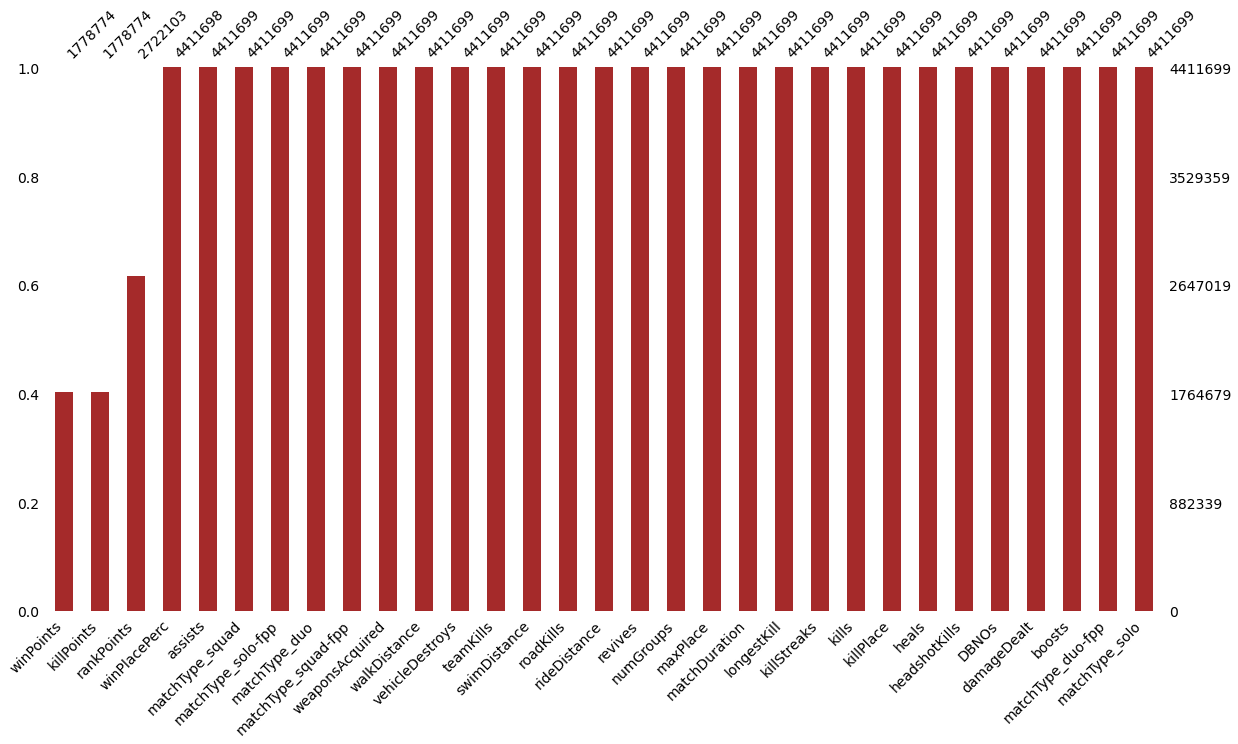

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
msno_graph_1 = msno.bar(total, color='brown', fontsize=14, sort='ascending',figsize=(20,10))
plt.show()
msno_graph_1.figure.savefig('msno_graph_1.jpg', bbox_inches = 'tight')

In [ ]:
total = total.fillna(-1)
total_test = total_test.fillna(-1)

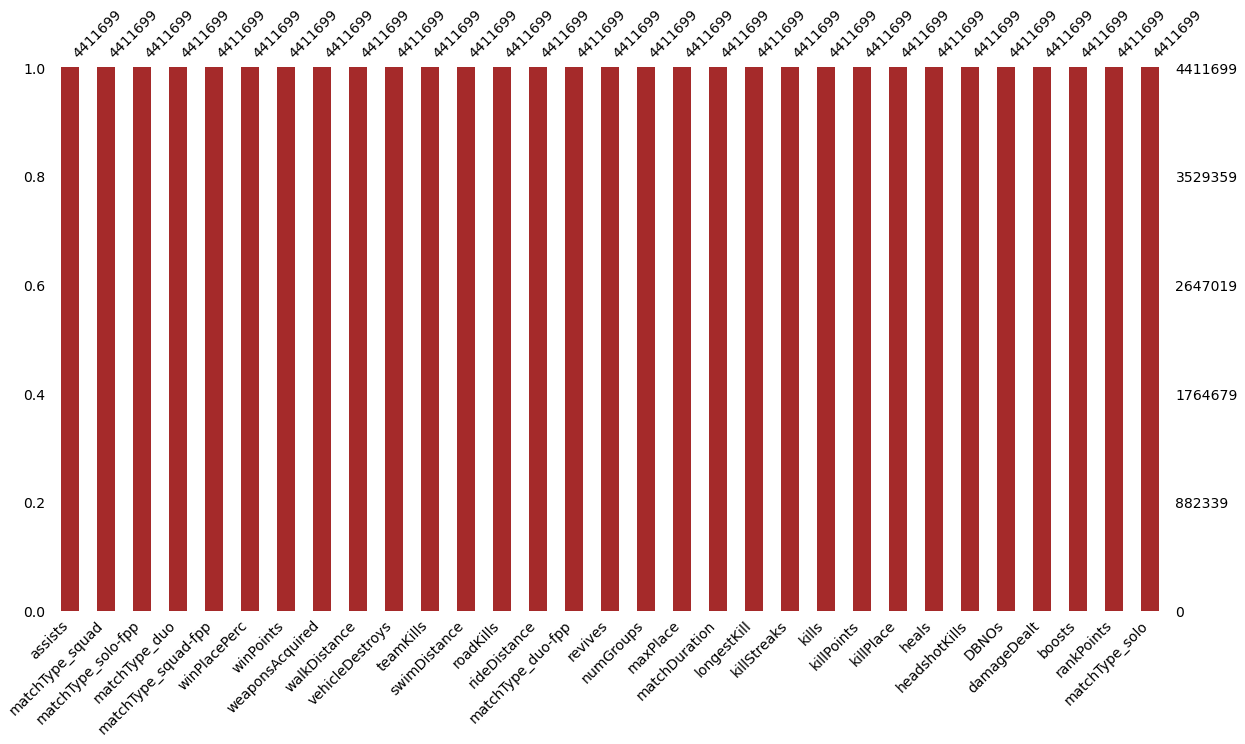

In [ ]:
msno_graph_2 = msno.bar(total, color='brown', fontsize=14, sort='ascending',figsize=(20,10))
msno_graph_2.figure.savefig('msno_graph_2.jpg', bbox_inches = 'tight')

**Handling Duplicate Records**

In [ ]:
total.duplicated().sum()

1510

In [ ]:
total = total.drop_duplicates()

**Detecting Outliers in dataframe using Seaborn BoxPlot and Handling them using Log Transformation**

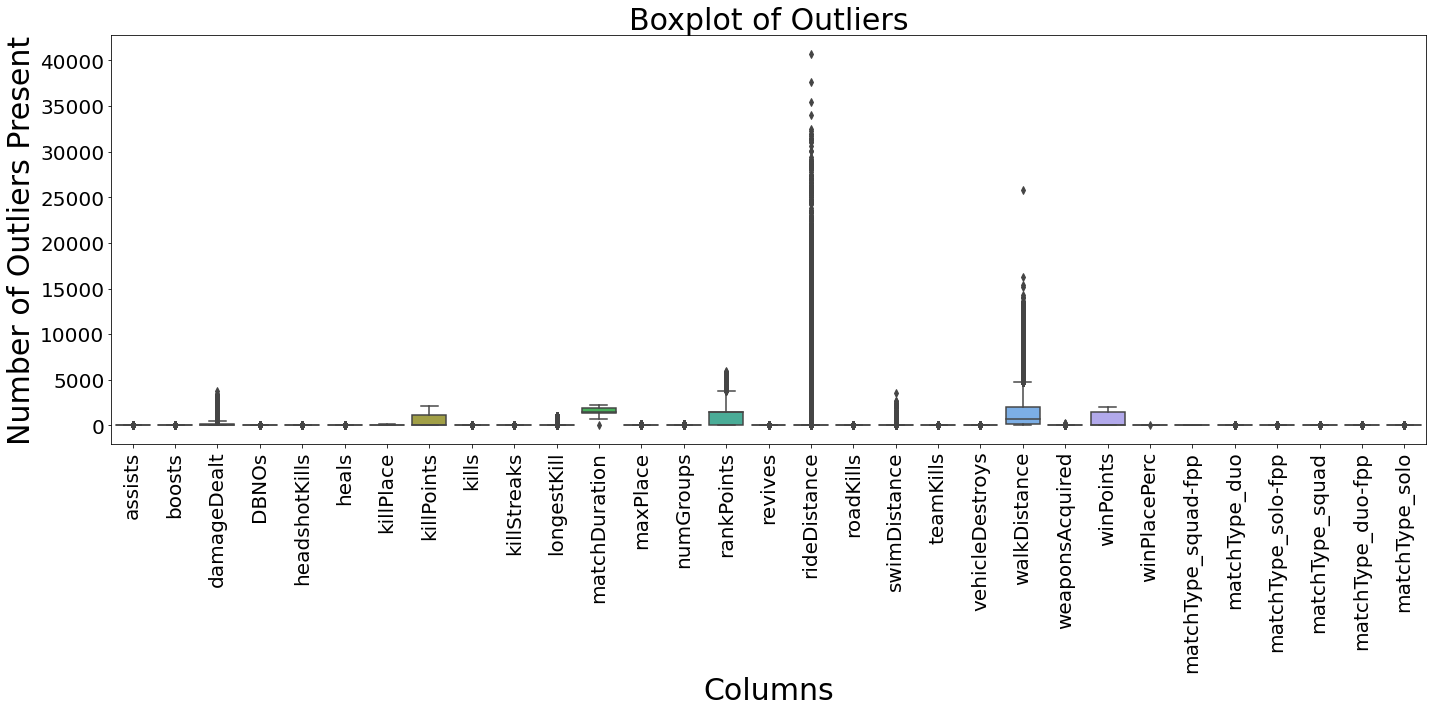

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
sns.boxplot(x="variable", y="value", data=pd.melt(total), ax = ax)
plt.xlabel('Columns', fontsize=30)
plt.ylabel('Number of Outliers Present', fontsize=30)
plt.title('Boxplot of Outliers', fontsize=30)
plt.tight_layout()
plt.savefig('Outliers.jpg')
plt.show()

In [ ]:
total['swimDistance'].max()

3514.0

In [ ]:
total = total[~(total['swimDistance'] == 3514)]
total['swimDistance'] = total['swimDistance'].map(lambda i: np.log(i) if i > 0 else 0)
total_test['swimDistance'] = total_test['swimDistance'].map(lambda i: np.log(i) if i > 0 else 0)

In [ ]:
total = total[~(total['walkDistance'] > 25000)]
total['walkDistance'] = total['walkDistance'].map(lambda i: np.log(i) if i > 0 else 0)
total_test['walkDistance'] = total_test['walkDistance'].map(lambda i: np.log(i) if i > 0 else 0)

In [ ]:
total['damageDealt'] = total['damageDealt'].map(lambda i: np.log(i) if i > 0 else 0)
total['rankPoints'] = total['rankPoints'].map(lambda i: np.log(i) if i > 0 else 0)
total['rideDistance'] = total['rideDistance'].map(lambda i: np.log(i) if i > 0 else 0)
total['longestKill'] = total['longestKill'].map(lambda i: np.log(i) if i > 0 else 0)
total['weaponsAcquired'] = total['weaponsAcquired'].map(lambda i: np.log(i) if i > 0 else 0)

total_test['damageDealt'] = total_test['damageDealt'].map(lambda i: np.log(i) if i > 0 else 0)
total_test['rankPoints'] = total_test['rankPoints'].map(lambda i: np.log(i) if i > 0 else 0)
total_test['rideDistance'] = total_test['rideDistance'].map(lambda i: np.log(i) if i > 0 else 0)
total_test['longestKill'] = total_test['longestKill'].map(lambda i: np.log(i) if i > 0 else 0)
total_test['weaponsAcquired'] = total_test['weaponsAcquired'].map(lambda i: np.log(i) if i > 0 else 0)

In [ ]:
total

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,matchType_squad-fpp,matchType_duo,matchType_solo-fpp,matchType_squad,matchType_duo-fpp,matchType_solo
0,0,0,0.000,0,0,0,60,1241.000,0,0,0.000,1306,28,26,0.000,0,0.000,0,0.000,0,0,5.500,0.000,1466.000,0.444,1,0,0,0,0,0
1,0,0,4.516,0,0,0,57,-1.000,0,0,0.000,1777,26,25,7.302,0,-5.404,0,2.402,0,0,7.268,1.609,-1.000,0.640,1,0,0,0,0,0
2,1,0,4.220,0,0,0,47,-1.000,0,0,0.000,1318,50,47,7.307,0,0.000,0,0.000,0,0,5.086,0.693,-1.000,0.775,0,1,0,0,0,0
3,0,0,3.493,0,0,0,75,-1.000,0,0,0.000,1436,31,30,7.250,0,0.000,0,0.000,0,0,5.312,1.099,-1.000,0.167,1,0,0,0,0,0
4,0,0,4.605,0,0,0,45,-1.000,1,1,4.070,1424,97,95,7.352,0,0.000,0,0.000,0,0,3.907,0.693,-1.000,0.188,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.000,0,0,0,74,1029.000,0,0,0.000,1873,29,28,0.000,0,7.164,0,0.000,0,0,6.927,1.099,1507.000,0.179,1,0,0,0,0,0
4446962,0,1,3.788,0,0,0,69,-1.000,0,0,0.000,1435,93,93,7.314,0,0.000,0,0.000,0,0,4.403,1.792,-1.000,0.293,0,0,0,0,0,1
4446963,0,0,4.079,0,0,0,66,-1.000,0,0,0.000,1321,28,28,7.313,0,0.000,0,0.781,0,0,6.670,1.386,-1.000,0.481,1,0,0,0,0,0
4446964,0,4,5.195,1,1,2,11,-1.000,2,1,4.590,1373,26,25,7.257,2,0.000,0,0.000,0,0,7.919,2.079,-1.000,0.800,1,0,0,0,0,0


# **Exploratory Data Analysis**

**Column Description**

In [ ]:
total.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,matchType_squad-fpp,matchType_duo,matchType_solo-fpp,matchType_squad,matchType_duo-fpp,matchType_solo
count,4410187.000,4410187.000,4410187.000,4410187.000,4410187.000,4410187.000,4410187.000,4410187.000,4410187.000,4410187.000,4410187.000,4410187.000,4410187.000,4410187.000,4410187.000,4410187.000,4410187.000,4410187.000,4410187.000,4410187.000,4410187.000,4410187.000,4410187.000,4410187.000,4410187.000,4410187.000,4410187.000,4410187.000,4410187.000,4410187.000,4410187.000
mean,0.229,1.105,3.450,0.654,0.224,1.363,47.740,505.776,0.912,0.542,1.407,1580.627,44.687,43.191,4.360,0.164,1.777,0.003,0.223,0.024,0.008,6.103,1.102,606.653,0.473,0.398,0.071,0.122,0.142,0.226,0.041
std,0.570,1.715,2.299,1.124,0.586,2.670,27.457,628.928,1.501,0.708,1.826,254.503,23.808,23.265,3.585,0.471,3.241,0.065,0.924,0.166,0.091,1.835,0.665,740.373,0.307,0.490,0.257,0.327,0.349,0.418,0.198
min,0.000,0.000,-8.517,0.000,0.000,0.000,1.000,-1.000,0.000,0.000,-4.029,9.000,1.000,1.000,0.000,0.000,-9.210,0.000,-9.210,0.000,0.000,-9.210,0.000,-1.000,-1.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,24.000,-1.000,0.000,0.000,0.000,1367.000,28.000,27.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.041,0.693,-1.000,0.200,0.000,0.000,0.000,0.000,0.000,0.000
50%,0.000,0.000,4.430,0.000,0.000,0.000,48.000,-1.000,0.000,0.000,0.000,1438.000,30.000,30.000,7.274,0.000,0.000,0.000,0.000,0.000,0.000,6.527,1.099,-1.000,0.458,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.000,2.000,5.221,1.000,0.000,2.000,71.000,1175.000,1.000,1.000,3.051,1850.000,49.000,47.000,7.313,0.000,0.000,0.000,0.000,0.000,0.000,7.589,1.609,1495.000,0.741,1.000,0.000,0.000,0.000,0.000,0.000
max,12.000,33.000,8.242,32.000,26.000,80.000,100.000,2170.000,33.000,18.000,6.911,2237.000,100.000,100.000,8.684,39.000,10.614,18.000,7.908,4.000,5.000,9.696,5.464,2013.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


**First 5 rows of the dataset**

In [ ]:
total.head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,matchType_squad-fpp,matchType_duo,matchType_solo-fpp,matchType_squad,matchType_duo-fpp,matchType_solo
0,0,0,0.000,0,0,0,60,1241.000,0,0,0.000,1306,28,26,0.000,0,0.000,0,0.000,0,0,5.500,0.000,1466.000,0.444,1,0,0,0,0,0
1,0,0,4.516,0,0,0,57,-1.000,0,0,0.000,1777,26,25,7.302,0,-5.404,0,2.402,0,0,7.268,1.609,-1.000,0.640,1,0,0,0,0,0
2,1,0,4.220,0,0,0,47,-1.000,0,0,0.000,1318,50,47,7.307,0,0.000,0,0.000,0,0,5.086,0.693,-1.000,0.775,0,1,0,0,0,0
3,0,0,3.493,0,0,0,75,-1.000,0,0,0.000,1436,31,30,7.250,0,0.000,0,0.000,0,0,5.312,1.099,-1.000,0.167,1,0,0,0,0,0
4,0,0,4.605,0,0,0,45,-1.000,1,1,4.070,1424,97,95,7.352,0,0.000,0,0.000,0,0,3.907,0.693,-1.000,0.188,0,0,1,0,0,0


**Last 5 rows of the dataset**

In [ ]:
total.tail()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,matchType_squad-fpp,matchType_duo,matchType_solo-fpp,matchType_squad,matchType_duo-fpp,matchType_solo
4446961,0,0,0.000,0,0,0,74,1029.000,0,0,0.000,1873,29,28,0.000,0,7.164,0,0.000,0,0,6.927,1.099,1507.000,0.179,1,0,0,0,0,0
4446962,0,1,3.788,0,0,0,69,-1.000,0,0,0.000,1435,93,93,7.314,0,0.000,0,0.000,0,0,4.403,1.792,-1.000,0.293,0,0,0,0,0,1
4446963,0,0,4.079,0,0,0,66,-1.000,0,0,0.000,1321,28,28,7.313,0,0.000,0,0.781,0,0,6.670,1.386,-1.000,0.481,1,0,0,0,0,0
4446964,0,4,5.195,1,1,2,11,-1.000,2,1,4.590,1373,26,25,7.257,2,0.000,0,0.000,0,0,7.919,2.079,-1.000,0.800,1,0,0,0,0,0
4446965,0,2,5.591,0,0,1,18,-1.000,2,1,4.360,1766,98,94,7.371,0,7.222,0,0.000,0,0,7.126,1.609,-1.000,0.546,0,0,1,0,0,0


**Shape of the dataframe**

In [ ]:
total.shape

(4410187, 31)

**Columns present in the dataframe**

In [ ]:
total.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', 'matchType_squad-fpp', 'matchType_duo',
       'matchType_solo-fpp', 'matchType_squad', 'matchType_duo-fpp',
       'matchType_solo'],
      dtype='object')

**Datatypes of the columns in the dataframe**

In [ ]:
total.dtypes

assists                  int64
boosts                   int64
damageDealt            float64
DBNOs                    int64
headshotKills            int64
heals                    int64
killPlace                int64
killPoints             float64
kills                    int64
killStreaks              int64
longestKill            float64
matchDuration            int64
maxPlace                 int64
numGroups                int64
rankPoints             float64
revives                  int64
rideDistance           float64
roadKills                int64
swimDistance           float64
teamKills                int64
vehicleDestroys          int64
walkDistance           float64
weaponsAcquired        float64
winPoints              float64
winPlacePerc           float64
matchType_squad-fpp      int64
matchType_duo            int64
matchType_solo-fpp       int64
matchType_squad          int64
matchType_duo-fpp        int64
matchType_solo           int64
dtype: object

# **Feature Engineering, Feature Selection and Dimensionality Reduction**

## **Dataframe consising of raw features**

**Using Random Forest Regressor for Feature Selection and Dimensionality Reduction**

In [ ]:
X = total.loc[:, total.columns != 'winPlacePerc']
Y = total.loc[:, total.columns == 'winPlacePerc']

In [ ]:
model = RandomForestRegressor(n_estimators=10, verbose=2)
model.fit(X, Y)
importance = model.feature_importances_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 14.8min finished


**Displaying column names of the dataframe and their respective feature importance**

In [ ]:
imp_features = pd.Series(data=importance,index=X.columns)
imp_features.sort_values(ascending=False,inplace=True)

In [ ]:
imp_features

walkDistance          0.704
killPlace             0.182
matchDuration         0.017
numGroups             0.016
maxPlace              0.011
kills                 0.009
rideDistance          0.007
damageDealt           0.007
rankPoints            0.006
longestKill           0.005
boosts                0.005
DBNOs                 0.005
weaponsAcquired       0.004
killStreaks           0.004
winPoints             0.003
killPoints            0.003
heals                 0.003
assists               0.001
matchType_squad       0.001
matchType_squad-fpp   0.001
revives               0.001
swimDistance          0.001
headshotKills         0.001
matchType_solo-fpp    0.001
matchType_duo-fpp     0.000
matchType_solo        0.000
matchType_duo         0.000
teamKills             0.000
vehicleDestroys       0.000
roadKills             0.000
dtype: float64

**Plotting Feature Importance**

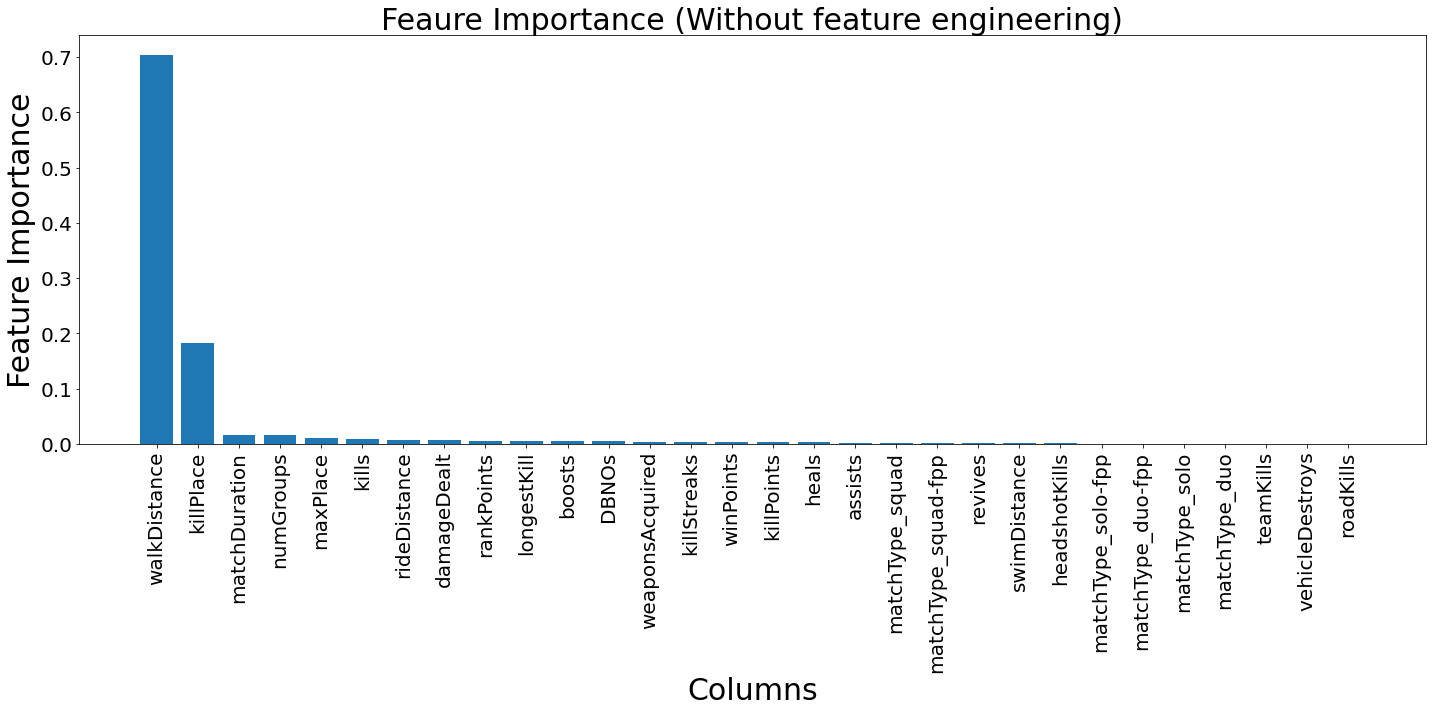

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plt.bar([x for x in range(len(imp_features))], imp_features)
ax.set_xticks([x for x in range(len(imp_features))])
ax.set_xticklabels(imp_features.index,rotation=90)
plt.xlabel('Columns', fontsize=30)
plt.ylabel('Feature Importance', fontsize=30)
plt.title('Feaure Importance (Without feature engineering)', fontsize=30)
plt.tight_layout()
plt.savefig('Feature_Importance_1.jpg')
plt.show()

## **Feature Selection for dataframe consisting of raw features and newly introduced features**

**Initializing dataframe total_FE, which will be considered as the dataframe containing raw features as well as the new features.**

In [ ]:
total_FE = total.copy(deep=True)
total_FE

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,matchType_squad-fpp,matchType_duo,matchType_solo-fpp,matchType_squad,matchType_duo-fpp,matchType_solo
0,0,0,0.000,0,0,0,60,1241.000,0,0,0.000,1306,28,26,0.000,0,0.000,0,0.000,0,0,5.500,0.000,1466.000,0.444,1,0,0,0,0,0
1,0,0,4.516,0,0,0,57,-1.000,0,0,0.000,1777,26,25,7.302,0,-5.404,0,2.402,0,0,7.268,1.609,-1.000,0.640,1,0,0,0,0,0
2,1,0,4.220,0,0,0,47,-1.000,0,0,0.000,1318,50,47,7.307,0,0.000,0,0.000,0,0,5.086,0.693,-1.000,0.775,0,1,0,0,0,0
3,0,0,3.493,0,0,0,75,-1.000,0,0,0.000,1436,31,30,7.250,0,0.000,0,0.000,0,0,5.312,1.099,-1.000,0.167,1,0,0,0,0,0
4,0,0,4.605,0,0,0,45,-1.000,1,1,4.070,1424,97,95,7.352,0,0.000,0,0.000,0,0,3.907,0.693,-1.000,0.188,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.000,0,0,0,74,1029.000,0,0,0.000,1873,29,28,0.000,0,7.164,0,0.000,0,0,6.927,1.099,1507.000,0.179,1,0,0,0,0,0
4446962,0,1,3.788,0,0,0,69,-1.000,0,0,0.000,1435,93,93,7.314,0,0.000,0,0.000,0,0,4.403,1.792,-1.000,0.293,0,0,0,0,0,1
4446963,0,0,4.079,0,0,0,66,-1.000,0,0,0.000,1321,28,28,7.313,0,0.000,0,0.781,0,0,6.670,1.386,-1.000,0.481,1,0,0,0,0,0
4446964,0,4,5.195,1,1,2,11,-1.000,2,1,4.590,1373,26,25,7.257,2,0.000,0,0.000,0,0,7.919,2.079,-1.000,0.800,1,0,0,0,0,0


**New Feature 1: Combining boost feature and heals feature into health**

In [ ]:
total_FE['health'] = total_FE['heals'] + total_FE['boosts']

**New Feature 2: Combining distance features into total distance**

In [ ]:
total_FE['total_distance_travelled'] = total_FE['walkDistance'] + total_FE['rideDistance'] + total_FE['swimDistance']

**Dropping the columns used for deriving new features**

In [ ]:
total_FE = total_FE.drop(['boosts','heals','walkDistance','rideDistance','swimDistance'], axis=1)

**Using Random Forest Regressor for Feature Selection and Dimensionality Reduction**

In [ ]:
X_FE = total_FE.loc[:, total_FE.columns != 'winPlacePerc']
Y_FE = total_FE.loc[:, total_FE.columns == 'winPlacePerc']

In [ ]:
model_FE = RandomForestRegressor(n_estimators=10, verbose=2)
model_FE.fit(X_FE, Y_FE)
imp_features_FE = model_FE.feature_importances_

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 14.4min finished


In [ ]:
imp_features_FE = pd.Series(data=imp_features_FE,index=X_FE.columns)
imp_features_FE.sort_values(ascending=False,inplace=True)

**Displaying column names of the dataframe and their respective feature importance**

In [ ]:
imp_features_FE

total_distance_travelled   0.624
killPlace                  0.243
matchDuration              0.021
health                     0.018
numGroups                  0.018
maxPlace                   0.011
damageDealt                0.008
kills                      0.008
longestKill                0.008
killStreaks                0.008
rankPoints                 0.007
weaponsAcquired            0.006
winPoints                  0.004
killPoints                 0.004
DBNOs                      0.003
assists                    0.002
matchType_squad            0.001
revives                    0.001
matchType_squad-fpp        0.001
headshotKills              0.001
matchType_solo-fpp         0.001
matchType_duo-fpp          0.001
matchType_solo             0.000
teamKills                  0.000
matchType_duo              0.000
vehicleDestroys            0.000
roadKills                  0.000
dtype: float64

**Plotting Feature Importance**

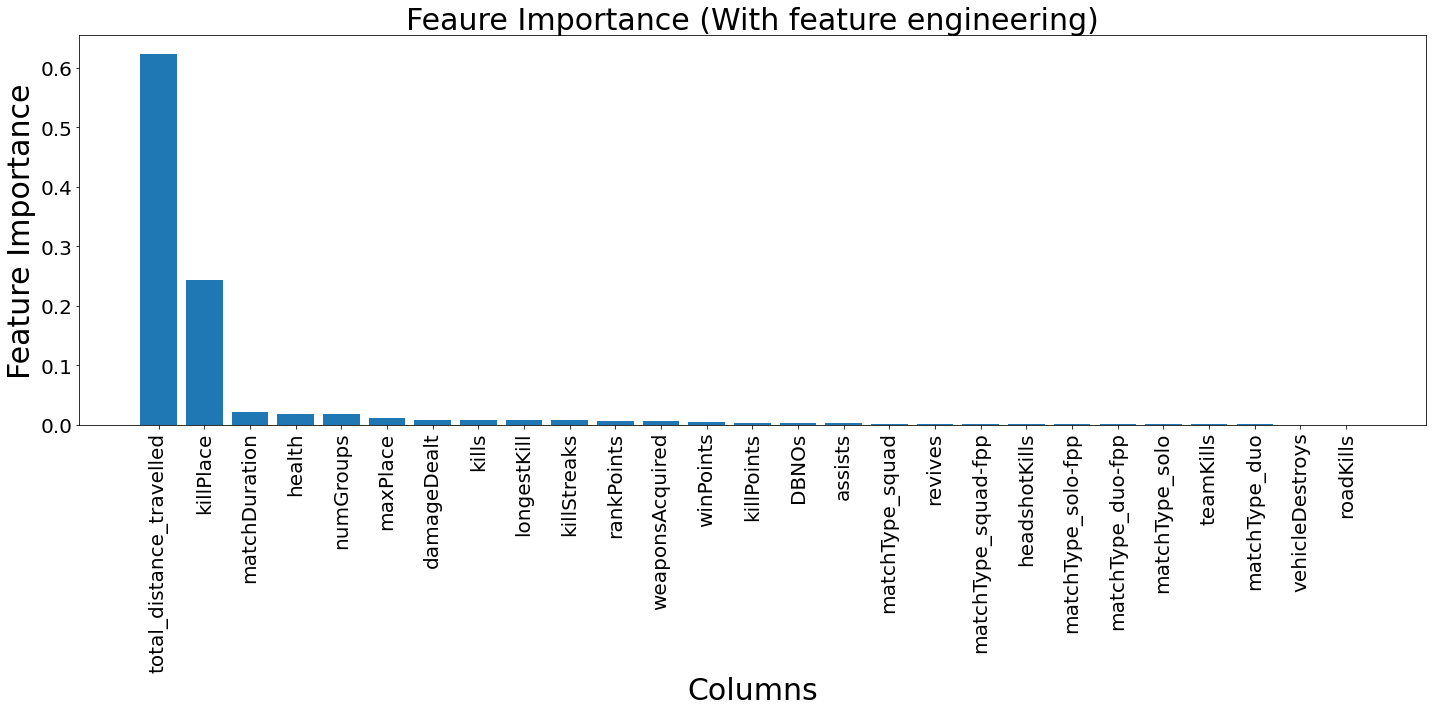

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
plt.bar([x for x in range(len(imp_features_FE))], imp_features_FE)
ax.set_xticks([x for x in range(len(imp_features_FE))])
ax.set_xticklabels(imp_features_FE.index,rotation=90)
plt.xlabel('Columns', fontsize=30)
plt.ylabel('Feature Importance', fontsize=30)
plt.title('Feaure Importance (With feature engineering)', fontsize=30)
plt.tight_layout()
plt.savefig('Feature_Importance_2.jpg')
plt.show()

## **Considering the features which only has good feature importance and dropping the rest**

In [ ]:
total = total[['walkDistance','killPlace','matchDuration','numGroups','maxPlace','rideDistance','damageDealt','kills','killStreaks','rankPoints','boosts','longestKill','DBNOs','weaponsAcquired','winPoints','killPoints','heals','winPlacePerc']].copy()
total_FE = total_FE[['total_distance_travelled','killPlace','matchDuration','numGroups','health','maxPlace','kills','damageDealt','longestKill','killStreaks','rankPoints','weaponsAcquired','winPoints','killPoints','winPlacePerc']].copy()

**Displaying final dataframes for both cases**

In [ ]:
total

,walkDistance,killPlace,matchDuration,numGroups,maxPlace,rideDistance,damageDealt,kills,killStreaks,rankPoints,boosts,longestKill,DBNOs,weaponsAcquired,winPoints,killPoints,heals,winPlacePerc
0,5.500,60,1306,26,28,0.000,0.000,0,0,0.000,0,0.000,0,0.000,1466.000,1241.000,0,0.444
1,7.268,57,1777,25,26,-5.404,4.516,0,0,7.302,0,0.000,0,1.609,-1.000,-1.000,0,0.640
2,5.086,47,1318,47,50,0.000,4.220,0,0,7.307,0,0.000,0,0.693,-1.000,-1.000,0,0.775
3,5.312,75,1436,30,31,0.000,3.493,0,0,7.250,0,0.000,0,1.099,-1.000,-1.000,0,0.167
4,3.907,45,1424,95,97,0.000,4.605,1,1,7.352,0,4.070,0,0.693,-1.000,-1.000,0,0.188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,6.927,74,1873,28,29,7.164,0.000,0,0,0.000,0,0.000,0,1.099,1507.000,1029.000,0,0.179
4446962,4.403,69,1435,93,93,0.000,3.788,0,0,7.314,1,0.000,0,1.792,-1.000,-1.000,0,0.293
4446963,6.670,66,1321,28,28,0.000,4.079,0,0,7.313,0,0.000,0,1.386,-1.000,-1.000,0,0.481
4446964,7.919,11,1373,25,26,0.000,5.195,2,1,7.257,4,4.590,1,2.079,-1.000,-1.000,2,0.800


In [ ]:
total_FE

,total_distance_travelled,killPlace,matchDuration,numGroups,health,maxPlace,kills,damageDealt,longestKill,killStreaks,rankPoints,weaponsAcquired,winPoints,killPoints,winPlacePerc
0,5.500,60,1306,26,0,28,0,0.000,0.000,0,0.000,0.000,1466.000,1241.000,0.444
1,4.266,57,1777,25,0,26,0,4.516,0.000,0,7.302,1.609,-1.000,-1.000,0.640
2,5.086,47,1318,47,0,50,0,4.220,0.000,0,7.307,0.693,-1.000,-1.000,0.775
3,5.312,75,1436,30,0,31,0,3.493,0.000,0,7.250,1.099,-1.000,-1.000,0.167
4,3.907,45,1424,95,0,97,1,4.605,4.070,1,7.352,0.693,-1.000,-1.000,0.188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,14.091,74,1873,28,0,29,0,0.000,0.000,0,0.000,1.099,1507.000,1029.000,0.179
4446962,4.403,69,1435,93,1,93,0,3.788,0.000,0,7.314,1.792,-1.000,-1.000,0.293
4446963,7.452,66,1321,28,0,28,0,4.079,0.000,0,7.313,1.386,-1.000,-1.000,0.481
4446964,7.919,11,1373,25,6,26,2,5.195,4.590,1,7.257,2.079,-1.000,-1.000,0.800


# **Splitting the dataframe into training and validation dataframe**

**Considering 80% data for training dataframe and remaining 20% data for validation dataset.**

In [ ]:
total_features = total.loc[:, total.columns != 'winPlacePerc']
total_target = total.loc[:, total.columns == 'winPlacePerc']
x_train, x_test, y_train, y_test = train_test_split(total_features, total_target, test_size=0.2, random_state=0)

total_FE_features = total_FE.loc[:, total_FE.columns != 'winPlacePerc']
total_FE_target = total_FE.loc[:, total_FE.columns == 'winPlacePerc']
x_train_FE, x_test_FE, y_train_FE, y_test_FE = train_test_split(total_FE_features, total_FE_target, test_size=0.2, random_state=0)

# **Scaling the dataframe**

**Using Robust Scaler technique for scaling both the dataframes.**

In [ ]:
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

scaler_FE = RobustScaler()
x_train_FE = scaler_FE.fit_transform(x_train_FE)
x_test_FE = scaler_FE.transform(x_test_FE)

# **Performing Predictive Modelling**

**Initialising 5-KFold Cross validation in variable**

In [ ]:
cv_method = KFold(5, True, 1)

## **Decision Tree Regression**

**Training and testing of Decision Tree Regression Model using GridSearch and Hyper-Parameter Tuning and Optimization**

### 1.   Without Feature Engineering

In [ ]:
params_DT = {'max_depth': [1, 3, 5],
             'min_samples_leaf': [1,2,3,4],
             'min_samples_split': [2, 3]
             }

gs_DT = GridSearchCV(estimator=DecisionTreeRegressor(),
                     param_grid=params_DT,
                     cv=cv_method,
                     scoring='neg_mean_absolute_error',
                     verbose=2)

grid_results_DT = gs_DT.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   3.8s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   3.8s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   3.8s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   3.8s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   3.8s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=3, total=   3.8s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=3, total=   3.8s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=3, total=   3.8s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 20.9min finished


In [ ]:
pkl_filename = "grid_results_DT.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(grid_results_DT, file)

In [ ]:
pkl_filename = "grid_results_DT.pkl"
with open(pkl_filename, 'rb') as file:
  grid_results_DT = pickle.load(file)

In [ ]:
grid_results_DT.best_params_

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3}

In [ ]:
gs_DT_MAE_train = grid_results_DT.best_score_
gs_DT_MAE_train

-0.08601503243154376

In [ ]:
y_pred = grid_results_DT.best_estimator_.predict(x_test)
gs_DT_RMSE_test = math.sqrt(mean_squared_error(y_test,y_pred))
gs_DT_RMSE_test

0.11874586885539254

In [ ]:
gs_DT_MSE_test = mean_squared_error(y_test,y_pred)
gs_DT_MSE_test

0.014100581370222085

In [ ]:
gs_DT_MAE_test = mean_absolute_error(y_test,y_pred)
gs_DT_MAE_test

0.08616852153805786

### 2.   With Feature Engineering

In [ ]:
params_DT_FE = {'max_depth': [1, 3, 5],
                'min_samples_leaf': [1,2,3,4],
                'min_samples_split': [2, 3]
                }

gs_DT_FE = GridSearchCV(estimator=DecisionTreeRegressor(),
                     param_grid=params_DT_FE,
                     cv=cv_method,
                     scoring='neg_mean_absolute_error',verbose=2)

grid_results_DT_FE = gs_DT_FE.fit(x_train_FE, y_train_FE)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   3.5s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   3.4s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   3.4s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   3.5s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=2 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=2, total=   3.9s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=3, total=   3.4s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=3, total=   3.4s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=3 ............
[CV]  max_depth=1, min_samples_leaf=1, min_samples_split=3, total=   3.4s
[CV] max_depth=1, min_samples_leaf=1, min_samples_split=

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 19.1min finished


In [ ]:
pkl_filename = "grid_results_DT_FE.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(grid_results_DT_FE, file)

In [ ]:
pkl_filename = "grid_results_DT_FE.pkl"
with open(pkl_filename, 'rb') as file:
  grid_results_DT_FE = pickle.load(file)

In [ ]:
grid_results_DT_FE.best_params_

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [ ]:
gs_DT_FE_MAE_train = grid_results_DT_FE.best_score_
gs_DT_FE_MAE_train

-0.09367332685361382

In [ ]:
y_pred_FE = grid_results_DT_FE.best_estimator_.predict(x_test_FE)
gs_DT_FE_RMSE_test = math.sqrt(mean_squared_error(y_test_FE,y_pred_FE))
gs_DT_FE_RMSE_test

0.12925623853019713

In [ ]:
gs_DT_FE_MSE_test = mean_squared_error(y_test_FE,y_pred_FE)
gs_DT_FE_MSE_test

0.016707175198975216

In [ ]:
gs_DT_FE_MAE_test = mean_absolute_error(y_test_FE,y_pred_FE)
gs_DT_FE_MAE_test

0.09371969314561857

## **Adaptive Boost Regression**

**Training and testing of AdaBoost Regression Model using GridSearch and Hyper-Parameter Tuning and Optimization**

### 1.   Without Feature Engineering

In [ ]:
params_ABR = {
    'n_estimators': [5,6,7],
    'learning_rate': [0.01,0.1]
}
gs_ABR = GridSearchCV(estimator=AdaBoostRegressor(),
                      param_grid=params_ABR,
                      cv=cv_method,
                      scoring='neg_mean_absolute_error',
                      verbose=2)

grid_results_ABR = gs_ABR.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] learning_rate=0.01, n_estimators=5 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... learning_rate=0.01, n_estimators=5, total= 1.2min
[CV] learning_rate=0.01, n_estimators=5 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... learning_rate=0.01, n_estimators=5, total= 1.2min
[CV] learning_rate=0.01, n_estimators=5 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... learning_rate=0.01, n_estimators=5, total= 1.2min
[CV] learning_rate=0.01, n_estimators=5 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... learning_rate=0.01, n_estimators=5, total= 1.2min
[CV] learning_rate=0.01, n_estimators=5 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... learning_rate=0.01, n_estimators=5, total= 1.2min
[CV] learning_rate=0.01, n_estimators=6 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... learning_rate=0.01, n_estimators=6, total= 1.4min
[CV] learning_rate=0.01, n_estimators=6 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... learning_rate=0.01, n_estimators=6, total= 1.4min
[CV] learning_rate=0.01, n_estimators=6 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... learning_rate=0.01, n_estimators=6, total= 1.4min
[CV] learning_rate=0.01, n_estimators=6 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... learning_rate=0.01, n_estimators=6, total= 1.4min
[CV] learning_rate=0.01, n_estimators=6 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... learning_rate=0.01, n_estimators=6, total= 1.4min
[CV] learning_rate=0.01, n_estimators=7 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... learning_rate=0.01, n_estimators=7, total= 1.6min
[CV] learning_rate=0.01, n_estimators=7 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... learning_rate=0.01, n_estimators=7, total= 1.6min
[CV] learning_rate=0.01, n_estimators=7 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... learning_rate=0.01, n_estimators=7, total= 1.6min
[CV] learning_rate=0.01, n_estimators=7 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... learning_rate=0.01, n_estimators=7, total= 1.6min
[CV] learning_rate=0.01, n_estimators=7 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... learning_rate=0.01, n_estimators=7, total= 1.6min
[CV] learning_rate=0.1, n_estimators=5 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ learning_rate=0.1, n_estimators=5, total= 1.2min
[CV] learning_rate=0.1, n_estimators=5 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ learning_rate=0.1, n_estimators=5, total= 1.2min
[CV] learning_rate=0.1, n_estimators=5 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ learning_rate=0.1, n_estimators=5, total= 1.2min
[CV] learning_rate=0.1, n_estimators=5 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ learning_rate=0.1, n_estimators=5, total= 1.2min
[CV] learning_rate=0.1, n_estimators=5 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ learning_rate=0.1, n_estimators=5, total= 1.2min
[CV] learning_rate=0.1, n_estimators=6 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ learning_rate=0.1, n_estimators=6, total= 1.4min
[CV] learning_rate=0.1, n_estimators=6 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ learning_rate=0.1, n_estimators=6, total= 1.4min
[CV] learning_rate=0.1, n_estimators=6 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ learning_rate=0.1, n_estimators=6, total= 1.4min
[CV] learning_rate=0.1, n_estimators=6 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ learning_rate=0.1, n_estimators=6, total= 1.4min
[CV] learning_rate=0.1, n_estimators=6 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ learning_rate=0.1, n_estimators=6, total= 1.4min
[CV] learning_rate=0.1, n_estimators=7 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ learning_rate=0.1, n_estimators=7, total= 1.6min
[CV] learning_rate=0.1, n_estimators=7 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ learning_rate=0.1, n_estimators=7, total= 1.6min
[CV] learning_rate=0.1, n_estimators=7 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ learning_rate=0.1, n_estimators=7, total= 1.5min
[CV] learning_rate=0.1, n_estimators=7 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ learning_rate=0.1, n_estimators=7, total= 1.5min
[CV] learning_rate=0.1, n_estimators=7 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ learning_rate=0.1, n_estimators=7, total= 1.5min


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 41.7min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
pkl_filename = "grid_results_ABR.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(grid_results_ABR, file)

In [ ]:
pkl_filename = "grid_results_ABR.pkl"
with open(pkl_filename, 'rb') as file:
  grid_results_ABR = pickle.load(file)

In [ ]:
gs_ABR_MAE_train = grid_results_ABR.best_score_
gs_ABR_MAE_train

-0.10020170560874342

In [ ]:
grid_results_ABR.best_params_

{'learning_rate': 0.1, 'n_estimators': 7}

In [ ]:
y_pred = grid_results_ABR.best_estimator_.predict(x_test)
gs_ABR_RMSE_test = math.sqrt(mean_squared_error(y_test,y_pred))
gs_ABR_RMSE_test

0.13433525748201164

In [ ]:
gs_ABR_MSE_test = mean_squared_error(y_test,y_pred)
gs_ABR_MSE_test

0.018045961402758368

In [ ]:
gs_ABR_MAE_test = mean_absolute_error(y_test,y_pred)
gs_ABR_MAE_test

0.09997945806827656

### 2.   With Feature Engineering

In [ ]:
params_ABR_FE = {
    'n_estimators': [5,10,15],
    'learning_rate': [0.01,0.1]
}
gs_ABR_FE = GridSearchCV(estimator=AdaBoostRegressor(),
                      param_grid=params_ABR_FE,
                      cv=cv_method,
                      scoring='neg_mean_absolute_error',
                      verbose=2)

grid_results_ABR_FE = gs_ABR_FE.fit(x_train_FE, y_train_FE)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] learning_rate=0.01, n_estimators=5 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... learning_rate=0.01, n_estimators=5, total=  59.9s
[CV] learning_rate=0.01, n_estimators=5 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.9s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... learning_rate=0.01, n_estimators=5, total= 1.0min
[CV] learning_rate=0.01, n_estimators=5 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... learning_rate=0.01, n_estimators=5, total= 1.0min
[CV] learning_rate=0.01, n_estimators=5 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... learning_rate=0.01, n_estimators=5, total= 1.0min
[CV] learning_rate=0.01, n_estimators=5 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... learning_rate=0.01, n_estimators=5, total= 1.0min
[CV] learning_rate=0.01, n_estimators=10 .............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............. learning_rate=0.01, n_estimators=10, total= 2.0min
[CV] learning_rate=0.01, n_estimators=10 .............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............. learning_rate=0.01, n_estimators=10, total= 2.0min
[CV] learning_rate=0.01, n_estimators=10 .............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............. learning_rate=0.01, n_estimators=10, total= 2.0min
[CV] learning_rate=0.01, n_estimators=10 .............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............. learning_rate=0.01, n_estimators=10, total= 2.0min
[CV] learning_rate=0.01, n_estimators=10 .............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............. learning_rate=0.01, n_estimators=10, total= 2.0min
[CV] learning_rate=0.01, n_estimators=15 .............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............. learning_rate=0.01, n_estimators=15, total= 3.0min
[CV] learning_rate=0.01, n_estimators=15 .............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............. learning_rate=0.01, n_estimators=15, total= 3.0min
[CV] learning_rate=0.01, n_estimators=15 .............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............. learning_rate=0.01, n_estimators=15, total= 3.0min
[CV] learning_rate=0.01, n_estimators=15 .............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............. learning_rate=0.01, n_estimators=15, total= 3.0min
[CV] learning_rate=0.01, n_estimators=15 .............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .............. learning_rate=0.01, n_estimators=15, total= 3.0min
[CV] learning_rate=0.1, n_estimators=5 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ learning_rate=0.1, n_estimators=5, total= 1.0min
[CV] learning_rate=0.1, n_estimators=5 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ learning_rate=0.1, n_estimators=5, total= 1.0min
[CV] learning_rate=0.1, n_estimators=5 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ learning_rate=0.1, n_estimators=5, total= 1.0min
[CV] learning_rate=0.1, n_estimators=5 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ learning_rate=0.1, n_estimators=5, total= 1.0min
[CV] learning_rate=0.1, n_estimators=5 ...............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................ learning_rate=0.1, n_estimators=5, total= 1.0min
[CV] learning_rate=0.1, n_estimators=10 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... learning_rate=0.1, n_estimators=10, total= 2.0min
[CV] learning_rate=0.1, n_estimators=10 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... learning_rate=0.1, n_estimators=10, total= 2.0min
[CV] learning_rate=0.1, n_estimators=10 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... learning_rate=0.1, n_estimators=10, total= 2.0min
[CV] learning_rate=0.1, n_estimators=10 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... learning_rate=0.1, n_estimators=10, total= 2.0min
[CV] learning_rate=0.1, n_estimators=10 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... learning_rate=0.1, n_estimators=10, total= 2.0min
[CV] learning_rate=0.1, n_estimators=15 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... learning_rate=0.1, n_estimators=15, total= 2.9min
[CV] learning_rate=0.1, n_estimators=15 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... learning_rate=0.1, n_estimators=15, total= 3.0min
[CV] learning_rate=0.1, n_estimators=15 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... learning_rate=0.1, n_estimators=15, total= 2.9min
[CV] learning_rate=0.1, n_estimators=15 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... learning_rate=0.1, n_estimators=15, total= 2.9min
[CV] learning_rate=0.1, n_estimators=15 ..............................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ............... learning_rate=0.1, n_estimators=15, total= 3.0min


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 60.2min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
pkl_filename = "grid_results_ABR_FE.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(grid_results_ABR_FE, file)

In [ ]:
pkl_filename = "grid_results_ABR_FE.pkl"
with open(pkl_filename, 'rb') as file:
  grid_results_ABR_FE = pickle.load(file)

In [ ]:
gs_ABR_FE_MAE_train = grid_results_ABR_FE.best_score_
gs_ABR_FE_MAE_train

-0.10720891966531094

In [ ]:
grid_results_ABR_FE.best_params_

{'learning_rate': 0.1, 'n_estimators': 15}

In [ ]:
y_pred_FE = grid_results_ABR_FE.best_estimator_.predict(x_test_FE)
gs_ABR_FE_RMSE_test = math.sqrt(mean_squared_error(y_test_FE,y_pred_FE))
gs_ABR_FE_RMSE_test

0.14324973728479334

In [ ]:
gs_ABR_FE_MSE_test = mean_squared_error(y_test_FE,y_pred_FE)
gs_ABR_FE_MSE_test

0.020520487232162314

In [ ]:
gs_ABR_FE_MAE_test = mean_absolute_error(y_test_FE,y_pred_FE)
gs_ABR_FE_MAE_test

0.10720953445341479

## **eXtreme Gradient Boost Regression**

**Training and testing of XGBoost Regression Model using GridSearch and Hyper-Parameter Tuning and Optimization**

### 1.   Without Feature Engineering

In [ ]:
params_XGB = {'max_depth':[4,6,8],
              'n_estimators': [5,10,15],
              'learning_rate': [0.1,0.01]
              }

gs_XGB = GridSearchCV(estimator = XGBRegressor(),
                      param_grid = params_XGB,
                      cv=cv_method,
                      scoring='neg_mean_absolute_error',
                      verbose=2)

grid_results_XGB = gs_XGB.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] learning_rate=0.1, max_depth=4, n_estimators=5 ..................
[16:06:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ... learning_rate=0.1, max_depth=4, n_estimators=5, total=  30.9s
[CV] learning_rate=0.1, max_depth=4, n_estimators=5 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   30.9s remaining:    0.0s


[16:07:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ... learning_rate=0.1, max_depth=4, n_estimators=5, total=  29.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=5 ..................
[16:07:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ... learning_rate=0.1, max_depth=4, n_estimators=5, total=  29.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=5 ..................
[16:08:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ... learning_rate=0.1, max_depth=4, n_estimators=5, total=  29.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=5 ..................
[16:08:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ... learning_rate=0.1, max_depth=4, n_estimators=5, total=  2

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 128.0min finished


[18:14:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
pkl_filename = "grid_results_XGB.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(grid_results_XGB, file)

In [ ]:
pkl_filename = "grid_results_XGB.pkl"
with open(pkl_filename, 'rb') as file:
  grid_results_XGB = pickle.load(file)

[19:36:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
gs_XGB_MAE_train = grid_results_XGB.best_score_
gs_XGB_MAE_train

-0.0892240978010099

In [ ]:
grid_results_XGB.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 15}

In [ ]:
y_pred = grid_results_XGB.best_estimator_.predict(x_test)
gs_XGB_RMSE_test = math.sqrt(mean_squared_error(y_test,y_pred))
gs_XGB_RMSE_test

0.11067922910568721

In [ ]:
gs_XGB_MSE_test = mean_squared_error(y_test,y_pred)
gs_XGB_MSE_test

0.012249891755429199

In [ ]:
gs_XGB_MAE_test = mean_absolute_error(y_test,y_pred)
gs_XGB_MAE_test

0.08930002533163404

### 2.   With Feature Engineering

In [ ]:
params_XGB_FE = {'max_depth':[4,6,8],
                 'n_estimators': [5,10,15],
                 'learning_rate': [0.1,0.01]
                 }

gs_XGB_FE = GridSearchCV(estimator = XGBRegressor(),
                      param_grid = params_XGB_FE,
                      cv=cv_method,
                      scoring='neg_mean_absolute_error',
                      verbose=2)

grid_results_XGB_FE = gs_XGB_FE.fit(x_train_FE, y_train_FE)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] learning_rate=0.1, max_depth=4, n_estimators=5 ..................
[18:18:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ... learning_rate=0.1, max_depth=4, n_estimators=5, total=  27.5s
[CV] learning_rate=0.1, max_depth=4, n_estimators=5 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   27.5s remaining:    0.0s


[18:19:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ... learning_rate=0.1, max_depth=4, n_estimators=5, total=  27.4s
[CV] learning_rate=0.1, max_depth=4, n_estimators=5 ..................
[18:19:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ... learning_rate=0.1, max_depth=4, n_estimators=5, total=  27.6s
[CV] learning_rate=0.1, max_depth=4, n_estimators=5 ..................
[18:20:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ... learning_rate=0.1, max_depth=4, n_estimators=5, total=  26.9s
[CV] learning_rate=0.1, max_depth=4, n_estimators=5 ..................
[18:20:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ... learning_rate=0.1, max_depth=4, n_estimators=5, total=  2

[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed: 114.3min finished


[20:12:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
pkl_filename = "grid_results_XGB_FE.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(grid_results_XGB_FE, file)

In [ ]:
pkl_filename = "grid_results_XGB_FE.pkl"
with open(pkl_filename, 'rb') as file:
  grid_results_XGB_FE = pickle.load(file)

[19:36:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
gs_XGB_FE_MAE_train = grid_results_XGB_FE.best_score_
gs_XGB_FE_MAE_train

-0.09316608474845818

In [ ]:
grid_results_XGB_FE.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 15}

In [ ]:
y_pred_FE = grid_results_XGB_FE.best_estimator_.predict(x_test_FE)
gs_XGB_FE_RMSE_test = math.sqrt(mean_squared_error(y_test_FE,y_pred_FE))
gs_XGB_FE_RMSE_test

0.11576732237607977

In [ ]:
gs_XGB_FE_MSE_test = mean_squared_error(y_test_FE,y_pred_FE)
gs_XGB_FE_MSE_test

0.01340207293012718

In [ ]:
gs_XGB_FE_MAE_test = mean_absolute_error(y_test_FE,y_pred_FE)
gs_XGB_FE_MAE_test

0.09330400618332284

## **Light Gradient Boosting Machine Regression**


**Training and testing of Light Gradient Boosting Machine Regression Model using GridSearch and Hyper-Parameter Tuning and Optimization**

### 1.   Without Feature Engineering

In [ ]:
params_LGBM = {'max_depth': [3,4,5,6],
               'n_estimators': [10,20,30],
               'learning_rate': [0.01,0.1]
               }

gs_LGBM = GridSearchCV(estimator = LGBMRegressor(),
                      param_grid = params_LGBM,
                      cv=cv_method,
                      scoring='neg_mean_absolute_error',
                      verbose=2)

grid_results_LGBM = gs_LGBM.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] learning_rate=0.01, max_depth=3, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=3, n_estimators=10, total=   6.4s
[CV] learning_rate=0.01, max_depth=3, n_estimators=10 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.4s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=3, n_estimators=10, total=   6.3s
[CV] learning_rate=0.01, max_depth=3, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=3, n_estimators=10, total=   6.3s
[CV] learning_rate=0.01, max_depth=3, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=3, n_estimators=10, total=   6.3s
[CV] learning_rate=0.01, max_depth=3, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=3, n_estimators=10, total=   6.3s
[CV] learning_rate=0.01, max_depth=3, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=3, n_estimators=20, total=   9.4s
[CV] learning_rate=0.01, max_depth=3, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=3, n_estimators=20, total=   9.0s
[CV] learning_rate=0.01, max_depth=3, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=3, n_estimators=20, total=   9.0s
[CV] learning_rate=0.01, max_depth=3, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=3, n_estimators=20, total=   9.1s
[CV] learning_rate=0.01, max_depth=3, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=3, n_estimators=20, total=   9.2s
[CV] learning_rate=0.01, max_depth=3, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=3, n_estimators=30, total=  11.9s
[CV] learning_rate=0.01, max_depth=3, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=3, n_estimators=30, total=  11.9s
[CV] learning_rate=0.01, max_depth=3, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=3, n_estimators=30, total=  11.8s
[CV] learning_rate=0.01, max_depth=3, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=3, n_estimators=30, total=  11.9s
[CV] learning_rate=0.01, max_depth=3, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=3, n_estimators=30, total=  11.9s
[CV] learning_rate=0.01, max_depth=4, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=4, n_estimators=10, total=   7.0s
[CV] learning_rate=0.01, max_depth=4, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=4, n_estimators=10, total=   7.0s
[CV] learning_rate=0.01, max_depth=4, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=4, n_estimators=10, total=   7.0s
[CV] learning_rate=0.01, max_depth=4, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=4, n_estimators=10, total=   7.0s
[CV] learning_rate=0.01, max_depth=4, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=4, n_estimators=10, total=   7.1s
[CV] learning_rate=0.01, max_depth=4, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=4, n_estimators=20, total=  10.5s
[CV] learning_rate=0.01, max_depth=4, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=4, n_estimators=20, total=  10.7s
[CV] learning_rate=0.01, max_depth=4, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=4, n_estimators=20, total=  10.6s
[CV] learning_rate=0.01, max_depth=4, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=4, n_estimators=20, total=  10.6s
[CV] learning_rate=0.01, max_depth=4, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=4, n_estimators=20, total=  10.6s
[CV] learning_rate=0.01, max_depth=4, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=4, n_estimators=30, total=  14.2s
[CV] learning_rate=0.01, max_depth=4, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=4, n_estimators=30, total=  14.2s
[CV] learning_rate=0.01, max_depth=4, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=4, n_estimators=30, total=  14.2s
[CV] learning_rate=0.01, max_depth=4, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=4, n_estimators=30, total=  14.2s
[CV] learning_rate=0.01, max_depth=4, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=4, n_estimators=30, total=  14.3s
[CV] learning_rate=0.01, max_depth=5, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=5, n_estimators=10, total=   8.0s
[CV] learning_rate=0.01, max_depth=5, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=5, n_estimators=10, total=   8.0s
[CV] learning_rate=0.01, max_depth=5, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=5, n_estimators=10, total=   8.0s
[CV] learning_rate=0.01, max_depth=5, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=5, n_estimators=10, total=   8.0s
[CV] learning_rate=0.01, max_depth=5, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=5, n_estimators=10, total=   8.0s
[CV] learning_rate=0.01, max_depth=5, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=5, n_estimators=20, total=  12.6s
[CV] learning_rate=0.01, max_depth=5, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=5, n_estimators=20, total=  12.5s
[CV] learning_rate=0.01, max_depth=5, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=5, n_estimators=20, total=  12.5s
[CV] learning_rate=0.01, max_depth=5, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=5, n_estimators=20, total=  12.6s
[CV] learning_rate=0.01, max_depth=5, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=5, n_estimators=20, total=  12.6s
[CV] learning_rate=0.01, max_depth=5, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=5, n_estimators=30, total=  17.1s
[CV] learning_rate=0.01, max_depth=5, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=5, n_estimators=30, total=  17.3s
[CV] learning_rate=0.01, max_depth=5, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=5, n_estimators=30, total=  17.2s
[CV] learning_rate=0.01, max_depth=5, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=5, n_estimators=30, total=  17.0s
[CV] learning_rate=0.01, max_depth=5, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=5, n_estimators=30, total=  17.0s
[CV] learning_rate=0.01, max_depth=6, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=6, n_estimators=10, total=   8.5s
[CV] learning_rate=0.01, max_depth=6, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=6, n_estimators=10, total=   8.5s
[CV] learning_rate=0.01, max_depth=6, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=6, n_estimators=10, total=   8.4s
[CV] learning_rate=0.01, max_depth=6, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=6, n_estimators=10, total=   8.5s
[CV] learning_rate=0.01, max_depth=6, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=6, n_estimators=10, total=   8.6s
[CV] learning_rate=0.01, max_depth=6, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=6, n_estimators=20, total=  13.6s
[CV] learning_rate=0.01, max_depth=6, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=6, n_estimators=20, total=  13.6s
[CV] learning_rate=0.01, max_depth=6, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=6, n_estimators=20, total=  13.8s
[CV] learning_rate=0.01, max_depth=6, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=6, n_estimators=20, total=  14.0s
[CV] learning_rate=0.01, max_depth=6, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=6, n_estimators=20, total=  13.8s
[CV] learning_rate=0.01, max_depth=6, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=6, n_estimators=30, total=  18.6s
[CV] learning_rate=0.01, max_depth=6, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=6, n_estimators=30, total=  18.7s
[CV] learning_rate=0.01, max_depth=6, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=6, n_estimators=30, total=  18.7s
[CV] learning_rate=0.01, max_depth=6, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=6, n_estimators=30, total=  18.7s
[CV] learning_rate=0.01, max_depth=6, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=6, n_estimators=30, total=  18.7s
[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=10, total=   6.3s
[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=10, total=   6.3s
[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=10, total=   6.3s
[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=10, total=   6.3s
[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=10, total=   6.3s
[CV] learning_rate=0.1, max_depth=3, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=20, total=   9.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=20, total=   9.3s
[CV] learning_rate=0.1, max_depth=3, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=20, total=   9.2s
[CV] learning_rate=0.1, max_depth=3, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=20, total=   9.2s
[CV] learning_rate=0.1, max_depth=3, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=20, total=   9.2s
[CV] learning_rate=0.1, max_depth=3, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=30, total=  11.9s
[CV] learning_rate=0.1, max_depth=3, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=30, total=  12.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=30, total=  11.9s
[CV] learning_rate=0.1, max_depth=3, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=30, total=  12.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=30, total=  12.0s
[CV] learning_rate=0.1, max_depth=4, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=4, n_estimators=10, total=   7.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=4, n_estimators=10, total=   7.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=4, n_estimators=10, total=   7.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=4, n_estimators=10, total=   7.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=4, n_estimators=10, total=   7.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=4, n_estimators=20, total=  10.8s
[CV] learning_rate=0.1, max_depth=4, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=4, n_estimators=20, total=  10.8s
[CV] learning_rate=0.1, max_depth=4, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=4, n_estimators=20, total=  10.8s
[CV] learning_rate=0.1, max_depth=4, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=4, n_estimators=20, total=  10.8s
[CV] learning_rate=0.1, max_depth=4, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=4, n_estimators=20, total=  10.8s
[CV] learning_rate=0.1, max_depth=4, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=4, n_estimators=30, total=  14.2s
[CV] learning_rate=0.1, max_depth=4, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=4, n_estimators=30, total=  14.3s
[CV] learning_rate=0.1, max_depth=4, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=4, n_estimators=30, total=  14.3s
[CV] learning_rate=0.1, max_depth=4, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=4, n_estimators=30, total=  14.5s
[CV] learning_rate=0.1, max_depth=4, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=4, n_estimators=30, total=  14.6s
[CV] learning_rate=0.1, max_depth=5, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=5, n_estimators=10, total=   8.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=5, n_estimators=10, total=   8.1s
[CV] learning_rate=0.1, max_depth=5, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=5, n_estimators=10, total=   8.1s
[CV] learning_rate=0.1, max_depth=5, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=5, n_estimators=10, total=   8.1s
[CV] learning_rate=0.1, max_depth=5, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=5, n_estimators=10, total=   8.1s
[CV] learning_rate=0.1, max_depth=5, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=5, n_estimators=20, total=  12.7s
[CV] learning_rate=0.1, max_depth=5, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=5, n_estimators=20, total=  13.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=5, n_estimators=20, total=  12.8s
[CV] learning_rate=0.1, max_depth=5, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=5, n_estimators=20, total=  12.8s
[CV] learning_rate=0.1, max_depth=5, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=5, n_estimators=20, total=  12.8s
[CV] learning_rate=0.1, max_depth=5, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=5, n_estimators=30, total=  17.3s
[CV] learning_rate=0.1, max_depth=5, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=5, n_estimators=30, total=  17.3s
[CV] learning_rate=0.1, max_depth=5, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=5, n_estimators=30, total=  17.3s
[CV] learning_rate=0.1, max_depth=5, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=5, n_estimators=30, total=  17.2s
[CV] learning_rate=0.1, max_depth=5, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=5, n_estimators=30, total=  17.2s
[CV] learning_rate=0.1, max_depth=6, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=6, n_estimators=10, total=   8.6s
[CV] learning_rate=0.1, max_depth=6, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=6, n_estimators=10, total=   8.6s
[CV] learning_rate=0.1, max_depth=6, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=6, n_estimators=10, total=   8.5s
[CV] learning_rate=0.1, max_depth=6, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=6, n_estimators=10, total=   8.5s
[CV] learning_rate=0.1, max_depth=6, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=6, n_estimators=10, total=   8.5s
[CV] learning_rate=0.1, max_depth=6, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=6, n_estimators=20, total=  13.5s
[CV] learning_rate=0.1, max_depth=6, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=6, n_estimators=20, total=  13.7s
[CV] learning_rate=0.1, max_depth=6, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=6, n_estimators=20, total=  13.6s
[CV] learning_rate=0.1, max_depth=6, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=6, n_estimators=20, total=  13.7s
[CV] learning_rate=0.1, max_depth=6, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=6, n_estimators=20, total=  13.8s
[CV] learning_rate=0.1, max_depth=6, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=6, n_estimators=30, total=  18.6s
[CV] learning_rate=0.1, max_depth=6, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=6, n_estimators=30, total=  18.8s
[CV] learning_rate=0.1, max_depth=6, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=6, n_estimators=30, total=  18.6s
[CV] learning_rate=0.1, max_depth=6, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=6, n_estimators=30, total=  18.8s
[CV] learning_rate=0.1, max_depth=6, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=6, n_estimators=30, total=  18.7s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 23.1min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
pkl_filename = "grid_results_LGBM.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(grid_results_LGBM, file)

In [ ]:
pkl_filename = "grid_results_LGBM.pkl"
with open(pkl_filename, 'rb') as file:
  grid_results_LGBM = pickle.load(file)

In [ ]:
gs_LGBM_MAE_train = grid_results_LGBM.best_score_
gs_LGBM_MAE_train

-0.06896389510543648

In [ ]:
grid_results_LGBM.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 30}

In [ ]:
y_pred = grid_results_LGBM.best_estimator_.predict(x_test)
gs_LGBM_RMSE_test = math.sqrt(mean_squared_error(y_test,y_pred))
gs_LGBM_RMSE_test

0.09417941407888172

In [ ]:
gs_LGBM_MSE_test = mean_squared_error(y_test,y_pred)
gs_LGBM_MSE_test

0.008869762036241466

In [ ]:
gs_LGBM_MAE_test = mean_absolute_error(y_test,y_pred)
gs_LGBM_MAE_test

0.06932874528914613

### 2.   With Feature Engineering

In [ ]:
params_LGBM_FE = {'max_depth': [3,4,5,6],
                  'n_estimators': [10,20,30],
                  'learning_rate': [0.01,0.1]
                  }

gs_LGBM_FE = GridSearchCV(estimator = LGBMRegressor(),
                      param_grid = params_LGBM_FE,
                      cv=cv_method,
                      scoring='neg_mean_absolute_error',
                      verbose=2)

grid_results_LGBM_FE = gs_LGBM_FE.fit(x_train_FE,y_train_FE)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] learning_rate=0.01, max_depth=3, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=3, n_estimators=10, total=   5.7s
[CV] learning_rate=0.01, max_depth=3, n_estimators=10 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=3, n_estimators=10, total=   5.5s
[CV] learning_rate=0.01, max_depth=3, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=3, n_estimators=10, total=   5.6s
[CV] learning_rate=0.01, max_depth=3, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=3, n_estimators=10, total=   5.6s
[CV] learning_rate=0.01, max_depth=3, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=3, n_estimators=10, total=   5.6s
[CV] learning_rate=0.01, max_depth=3, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=3, n_estimators=20, total=   8.0s
[CV] learning_rate=0.01, max_depth=3, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=3, n_estimators=20, total=   7.9s
[CV] learning_rate=0.01, max_depth=3, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=3, n_estimators=20, total=   8.0s
[CV] learning_rate=0.01, max_depth=3, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=3, n_estimators=20, total=   8.0s
[CV] learning_rate=0.01, max_depth=3, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=3, n_estimators=20, total=   8.0s
[CV] learning_rate=0.01, max_depth=3, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=3, n_estimators=30, total=  10.4s
[CV] learning_rate=0.01, max_depth=3, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=3, n_estimators=30, total=  10.3s
[CV] learning_rate=0.01, max_depth=3, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=3, n_estimators=30, total=  10.4s
[CV] learning_rate=0.01, max_depth=3, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=3, n_estimators=30, total=  10.3s
[CV] learning_rate=0.01, max_depth=3, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=3, n_estimators=30, total=  10.4s
[CV] learning_rate=0.01, max_depth=4, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=4, n_estimators=10, total=   6.3s
[CV] learning_rate=0.01, max_depth=4, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=4, n_estimators=10, total=   6.2s
[CV] learning_rate=0.01, max_depth=4, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=4, n_estimators=10, total=   6.3s
[CV] learning_rate=0.01, max_depth=4, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=4, n_estimators=10, total=   6.2s
[CV] learning_rate=0.01, max_depth=4, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=4, n_estimators=10, total=   6.2s
[CV] learning_rate=0.01, max_depth=4, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=4, n_estimators=20, total=   9.2s
[CV] learning_rate=0.01, max_depth=4, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=4, n_estimators=20, total=   9.3s
[CV] learning_rate=0.01, max_depth=4, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=4, n_estimators=20, total=   9.4s
[CV] learning_rate=0.01, max_depth=4, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=4, n_estimators=20, total=   9.4s
[CV] learning_rate=0.01, max_depth=4, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=4, n_estimators=20, total=   9.3s
[CV] learning_rate=0.01, max_depth=4, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=4, n_estimators=30, total=  12.3s
[CV] learning_rate=0.01, max_depth=4, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=4, n_estimators=30, total=  12.5s
[CV] learning_rate=0.01, max_depth=4, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=4, n_estimators=30, total=  12.5s
[CV] learning_rate=0.01, max_depth=4, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=4, n_estimators=30, total=  12.3s
[CV] learning_rate=0.01, max_depth=4, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=4, n_estimators=30, total=  12.3s
[CV] learning_rate=0.01, max_depth=5, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=5, n_estimators=10, total=   6.9s
[CV] learning_rate=0.01, max_depth=5, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=5, n_estimators=10, total=   6.9s
[CV] learning_rate=0.01, max_depth=5, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=5, n_estimators=10, total=   7.0s
[CV] learning_rate=0.01, max_depth=5, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=5, n_estimators=10, total=   7.0s
[CV] learning_rate=0.01, max_depth=5, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=5, n_estimators=10, total=   7.0s
[CV] learning_rate=0.01, max_depth=5, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=5, n_estimators=20, total=  10.8s
[CV] learning_rate=0.01, max_depth=5, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=5, n_estimators=20, total=  10.8s
[CV] learning_rate=0.01, max_depth=5, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=5, n_estimators=20, total=  10.9s
[CV] learning_rate=0.01, max_depth=5, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=5, n_estimators=20, total=  10.9s
[CV] learning_rate=0.01, max_depth=5, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=5, n_estimators=20, total=  10.9s
[CV] learning_rate=0.01, max_depth=5, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=5, n_estimators=30, total=  14.7s
[CV] learning_rate=0.01, max_depth=5, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=5, n_estimators=30, total=  14.9s
[CV] learning_rate=0.01, max_depth=5, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=5, n_estimators=30, total=  14.9s
[CV] learning_rate=0.01, max_depth=5, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=5, n_estimators=30, total=  14.9s
[CV] learning_rate=0.01, max_depth=5, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=5, n_estimators=30, total=  14.7s
[CV] learning_rate=0.01, max_depth=6, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=6, n_estimators=10, total=   7.3s
[CV] learning_rate=0.01, max_depth=6, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=6, n_estimators=10, total=   7.3s
[CV] learning_rate=0.01, max_depth=6, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=6, n_estimators=10, total=   7.4s
[CV] learning_rate=0.01, max_depth=6, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=6, n_estimators=10, total=   7.4s
[CV] learning_rate=0.01, max_depth=6, n_estimators=10 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=6, n_estimators=10, total=   7.4s
[CV] learning_rate=0.01, max_depth=6, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=6, n_estimators=20, total=  11.7s
[CV] learning_rate=0.01, max_depth=6, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=6, n_estimators=20, total=  11.6s
[CV] learning_rate=0.01, max_depth=6, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=6, n_estimators=20, total=  11.7s
[CV] learning_rate=0.01, max_depth=6, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=6, n_estimators=20, total=  11.6s
[CV] learning_rate=0.01, max_depth=6, n_estimators=20 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=6, n_estimators=20, total=  11.7s
[CV] learning_rate=0.01, max_depth=6, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=6, n_estimators=30, total=  15.9s
[CV] learning_rate=0.01, max_depth=6, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=6, n_estimators=30, total=  16.2s
[CV] learning_rate=0.01, max_depth=6, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=6, n_estimators=30, total=  16.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=6, n_estimators=30, total=  15.9s
[CV] learning_rate=0.01, max_depth=6, n_estimators=30 ................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] . learning_rate=0.01, max_depth=6, n_estimators=30, total=  16.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=10, total=   5.5s
[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=10, total=   5.5s
[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=10, total=   5.6s
[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=10, total=   5.6s
[CV] learning_rate=0.1, max_depth=3, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=10, total=   5.6s
[CV] learning_rate=0.1, max_depth=3, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=20, total=   8.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=20, total=   8.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=20, total=   8.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=20, total=   8.1s
[CV] learning_rate=0.1, max_depth=3, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=20, total=   8.0s
[CV] learning_rate=0.1, max_depth=3, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=30, total=  10.5s
[CV] learning_rate=0.1, max_depth=3, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=30, total=  10.5s
[CV] learning_rate=0.1, max_depth=3, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=30, total=  10.4s
[CV] learning_rate=0.1, max_depth=3, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=30, total=  10.4s
[CV] learning_rate=0.1, max_depth=3, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=3, n_estimators=30, total=  10.4s
[CV] learning_rate=0.1, max_depth=4, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=4, n_estimators=10, total=   6.3s
[CV] learning_rate=0.1, max_depth=4, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=4, n_estimators=10, total=   6.2s
[CV] learning_rate=0.1, max_depth=4, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=4, n_estimators=10, total=   6.2s
[CV] learning_rate=0.1, max_depth=4, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=4, n_estimators=10, total=   6.1s
[CV] learning_rate=0.1, max_depth=4, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=4, n_estimators=10, total=   6.2s
[CV] learning_rate=0.1, max_depth=4, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=4, n_estimators=20, total=   9.4s
[CV] learning_rate=0.1, max_depth=4, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=4, n_estimators=20, total=   9.3s
[CV] learning_rate=0.1, max_depth=4, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=4, n_estimators=20, total=   9.3s
[CV] learning_rate=0.1, max_depth=4, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=4, n_estimators=20, total=   9.4s
[CV] learning_rate=0.1, max_depth=4, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=4, n_estimators=20, total=   9.4s
[CV] learning_rate=0.1, max_depth=4, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=4, n_estimators=30, total=  12.4s
[CV] learning_rate=0.1, max_depth=4, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=4, n_estimators=30, total=  12.5s
[CV] learning_rate=0.1, max_depth=4, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=4, n_estimators=30, total=  12.5s
[CV] learning_rate=0.1, max_depth=4, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=4, n_estimators=30, total=  12.5s
[CV] learning_rate=0.1, max_depth=4, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=4, n_estimators=30, total=  12.5s
[CV] learning_rate=0.1, max_depth=5, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=5, n_estimators=10, total=   7.1s
[CV] learning_rate=0.1, max_depth=5, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=5, n_estimators=10, total=   7.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=5, n_estimators=10, total=   7.1s
[CV] learning_rate=0.1, max_depth=5, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=5, n_estimators=10, total=   6.9s
[CV] learning_rate=0.1, max_depth=5, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=5, n_estimators=10, total=   7.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=5, n_estimators=20, total=  11.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=5, n_estimators=20, total=  11.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=5, n_estimators=20, total=  10.9s
[CV] learning_rate=0.1, max_depth=5, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=5, n_estimators=20, total=  11.0s
[CV] learning_rate=0.1, max_depth=5, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=5, n_estimators=20, total=  10.9s
[CV] learning_rate=0.1, max_depth=5, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=5, n_estimators=30, total=  14.9s
[CV] learning_rate=0.1, max_depth=5, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=5, n_estimators=30, total=  14.8s
[CV] learning_rate=0.1, max_depth=5, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=5, n_estimators=30, total=  14.9s
[CV] learning_rate=0.1, max_depth=5, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=5, n_estimators=30, total=  15.3s
[CV] learning_rate=0.1, max_depth=5, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=5, n_estimators=30, total=  14.8s
[CV] learning_rate=0.1, max_depth=6, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=6, n_estimators=10, total=   7.4s
[CV] learning_rate=0.1, max_depth=6, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=6, n_estimators=10, total=   7.4s
[CV] learning_rate=0.1, max_depth=6, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=6, n_estimators=10, total=   7.3s
[CV] learning_rate=0.1, max_depth=6, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=6, n_estimators=10, total=   7.3s
[CV] learning_rate=0.1, max_depth=6, n_estimators=10 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=6, n_estimators=10, total=   7.4s
[CV] learning_rate=0.1, max_depth=6, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=6, n_estimators=20, total=  11.6s
[CV] learning_rate=0.1, max_depth=6, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=6, n_estimators=20, total=  11.8s
[CV] learning_rate=0.1, max_depth=6, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=6, n_estimators=20, total=  11.8s
[CV] learning_rate=0.1, max_depth=6, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=6, n_estimators=20, total=  11.7s
[CV] learning_rate=0.1, max_depth=6, n_estimators=20 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=6, n_estimators=20, total=  11.8s
[CV] learning_rate=0.1, max_depth=6, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=6, n_estimators=30, total=  16.3s
[CV] learning_rate=0.1, max_depth=6, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=6, n_estimators=30, total=  16.3s
[CV] learning_rate=0.1, max_depth=6, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=6, n_estimators=30, total=  16.3s
[CV] learning_rate=0.1, max_depth=6, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=6, n_estimators=30, total=  16.1s
[CV] learning_rate=0.1, max_depth=6, n_estimators=30 .................


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .. learning_rate=0.1, max_depth=6, n_estimators=30, total=  16.1s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 20.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
pkl_filename = "grid_results_LGBM_FE.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(grid_results_LGBM_FE, file)

In [ ]:
pkl_filename = "grid_results_LGBM_FE.pkl"
with open(pkl_filename, 'rb') as file:
  grid_results_LGBM_FE = pickle.load(file)

In [ ]:
gs_LGBM_FE_MAE_train = grid_results_LGBM_FE.best_score_
gs_LGBM_FE_MAE_train

-0.07429446723322342

In [ ]:
grid_results_LGBM_FE.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 30}

In [ ]:
y_pred_FE = grid_results_LGBM_FE.best_estimator_.predict(x_test_FE)
gs_LGBM_FE_RMSE_test = math.sqrt(mean_squared_error(y_test_FE,y_pred_FE))
gs_LGBM_FE_RMSE_test

0.10073444673299622

In [ ]:
gs_LGBM_FE_MSE_test = mean_squared_error(y_test_FE,y_pred_FE)
gs_LGBM_FE_MSE_test

0.010147428758602852

In [ ]:
gs_LGBM_FE_MAE_test = mean_absolute_error(y_test_FE,y_pred_FE)
gs_LGBM_FE_MAE_test

0.07412639066782083

## **Multi-Layer Perceptron Regression**

**Training and testing of Deep Learning Multi-Layer Perceptron Regression Model using GridSearch and Hyper-Parameter Tuning and Optimization**

### 1.   Without Feature Engineering

In [ ]:
params_MLP = {'hidden_layer_sizes': [(10,10,1), (20,10,1)],
              'learning_rate_init': [0.01,0.1],
              'max_iter': [5,10,15]
              }

gs_MLP = GridSearchCV(estimator = MLPRegressor(),
                      param_grid = params_MLP,
                      cv=cv_method,
                      scoring='neg_mean_absolute_error',
                      verbose=2)
grid_results_MLP = gs_MLP.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=5, total=  49.9s
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   49.9s remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=5, total= 1.5min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=5, total=  57.4s
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=5, total=  53.1s
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=5, total= 1.4min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=10, total= 3.0min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=10, total= 1.8min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=10, total= 1.9min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=10, total= 3.4min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=10, total= 3.1min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=15, total= 3.9min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=15, total= 2.4min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=15, total= 3.4min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=15, total= 2.6min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=15, total= 2.5min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=5, total= 1.3min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=5, total= 1.6min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=5, total= 1.2min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=5, total= 1.5min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=5, total= 1.3min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=10, total= 3.2min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=10, total= 3.0min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=10, total= 2.7min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=10, total= 3.2min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=10, total= 3.3min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=15, total= 4.3min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=15, total= 3.6min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=15, total= 4.0min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=15, total= 3.5min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=15, total= 3.9min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=5, total= 1.1min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=5, total= 1.5min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=5, total= 1.0min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=5, total= 1.0min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=5, total= 1.0min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=10, total= 4.4min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=10, total= 4.4min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=10, total= 2.7min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=10, total= 1.9min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=10, total= 2.8min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=15, total= 3.4min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=15, total= 6.1min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=15, total= 3.7min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=15, total= 6.2min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=15, total= 3.7min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=5, total= 2.2min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=5, total= 2.3min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=5, total= 2.2min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=5, total= 1.7min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=5, total= 2.3min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=10, total= 4.4min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=10, total= 3.9min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=10, total= 4.5min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=10, total= 4.2min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=10, total= 3.9min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=15, total= 5.1min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=15, total= 6.3min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=15, total= 4.9min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=15, total= 5.4min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=15, total= 5.1min


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 178.7min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
pkl_filename = "grid_results_MLP.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(grid_results_MLP, file)

In [ ]:
pkl_filename = "grid_results_MLP.pkl"
with open(pkl_filename, 'rb') as file:
  grid_results_MLP = pickle.load(file)

In [ ]:
gs_MLP_MAE_train = grid_results_MLP.best_score_
gs_MLP_MAE_train

-0.06220865289793165

In [ ]:
grid_results_MLP.best_params_

{'hidden_layer_sizes': (20, 10, 1), 'learning_rate_init': 0.01, 'max_iter': 5}

In [ ]:
y_pred = grid_results_MLP.best_estimator_.predict(x_test)
gs_MLP_RMSE_test = math.sqrt(mean_squared_error(y_test,y_pred))
gs_MLP_RMSE_test

0.08598119584737979

In [ ]:
gs_MLP_MSE_test = mean_squared_error(y_test,y_pred)
gs_MLP_MSE_test

0.0073927660393454785

In [ ]:
gs_MLP_MAE_test =mean_absolute_error(y_test, y_pred)
gs_MLP_MAE_test

0.06263250682185963

### 2.   With Feature Engineering

In [ ]:
params_MLP_FE = {'hidden_layer_sizes': [(10,10,1), (20,10,1)],
                 'learning_rate_init': [0.01,0.1],
                 'max_iter': [5,10,15]
                 }

gs_MLP_FE = GridSearchCV(estimator = MLPRegressor(),
                         param_grid = params_MLP_FE,
                         cv=cv_method,
                         scoring='neg_mean_absolute_error',
                         verbose=2)

grid_results_MLP_FE = gs_MLP_FE.fit(x_train_FE, y_train_FE)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=5, total= 1.4min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min remaining:    0.0s
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=5, total=  51.6s
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=5, total= 1.5min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=5, total=  54.0s
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=5, total= 1.3min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=10, total= 2.8min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=10, total= 1.7min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=10, total= 1.8min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=10, total= 2.9min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=10, total= 2.1min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=15, total= 4.2min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=15, total= 4.0min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=15, total= 3.9min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=15, total= 3.2min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.01, max_iter=15, total= 3.9min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=5, total= 1.2min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=5, total= 1.5min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=5, total= 1.3min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=5, total= 1.3min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=5, total= 1.2min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=10, total= 2.9min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=10, total= 2.6min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=10, total= 3.0min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=10, total= 3.0min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=10, total= 2.8min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=15, total= 3.9min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=15, total= 4.1min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=15, total= 4.2min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=15, total= 3.4min
[CV] hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(10, 10, 1), learning_rate_init=0.1, max_iter=15, total= 3.6min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=5, total= 1.2min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=5, total= 2.1min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=5, total= 1.1min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=5, total= 1.1min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=5, total= 2.1min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=10, total= 4.2min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=10, total= 2.1min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=10, total= 4.1min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=10, total= 2.2min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=10, total= 4.4min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=15, total= 3.9min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=15, total= 3.1min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=15, total= 5.9min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=15, total= 3.2min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.01, max_iter=15, total= 5.6min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=5, total= 2.0min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=5, total= 2.2min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=5, total= 1.8min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=5, total= 2.1min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=5 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=5, total= 1.6min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=10, total= 4.4min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=10, total= 4.7min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=10, total= 4.1min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=10, total= 4.7min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=10 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=10, total= 3.5min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=15, total= 5.5min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=15, total= 4.7min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=15, total= 5.8min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=15, total= 4.7min
[CV] hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=15 


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  hidden_layer_sizes=(20, 10, 1), learning_rate_init=0.1, max_iter=15, total= 4.7min


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 179.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
pkl_filename = "grid_results_MLP_FE.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(grid_results_MLP_FE, file)

In [ ]:
pkl_filename = "grid_results_MLP_FE.pkl"
with open(pkl_filename, 'rb') as file:
  grid_results_MLP_FE = pickle.load(file)

In [ ]:
gs_MLP_FE_MAE_train = grid_results_MLP_FE.best_score_
gs_MLP_FE_MAE_train

-0.147178007297274

In [ ]:
grid_results_MLP_FE.best_params_

{'hidden_layer_sizes': (20, 10, 1), 'learning_rate_init': 0.01, 'max_iter': 5}

In [ ]:
y_pred_FE = grid_results_MLP_FE.best_estimator_.predict(x_test_FE)
gs_MLP_FE_RMSE_test = math.sqrt(mean_squared_error(y_test_FE,y_pred_FE))
gs_MLP_FE_RMSE_test

0.307656028719323

In [ ]:
gs_MLP_FE_MSE_test = mean_squared_error(y_test_FE,y_pred_FE)
gs_MLP_FE_MSE_test

0.09465223200734492

In [ ]:
gs_MLP_FE_MAE_test =mean_absolute_error(y_test_FE, y_pred_FE)
gs_MLP_FE_MAE_test

0.26843955977771816

# **Model Evaluation**

## **Evaluation for Models without Feature Engineering**

In [ ]:
Eval = pd.DataFrame({
    "MAE_Train":[abs(gs_DT_MAE_train),abs(gs_ABR_MAE_train),abs(gs_XGB_MAE_train),abs(gs_LGBM_MAE_train),abs(gs_MLP_MAE_train)],
    "MAE_Test":[gs_DT_MAE_test,gs_ABR_MAE_test,gs_XGB_MAE_test,gs_LGBM_MAE_test,gs_MLP_MAE_test],
    "RMSE_Test":[gs_DT_RMSE_test,gs_ABR_RMSE_test,gs_XGB_RMSE_test,gs_LGBM_RMSE_test,gs_MLP_RMSE_test],
    "MSE_Test":[gs_DT_MSE_test,gs_ABR_MSE_test,gs_XGB_MSE_test,gs_LGBM_MSE_test,gs_MLP_MSE_test]
    },
    index=['Decision Tree','AdaBoost','XGBoost','LGBM','MLP'])

In [ ]:
Eval.sort_values(by=['RMSE_Test'], inplace=True)
Eval

,MAE_Train,MAE_Test,RMSE_Test,MSE_Test
MLP,0.062,0.063,0.086,0.007
LGBM,0.069,0.069,0.094,0.009
XGBoost,0.089,0.089,0.111,0.012
Decision Tree,0.086,0.086,0.119,0.014
AdaBoost,0.100,0.100,0.134,0.018


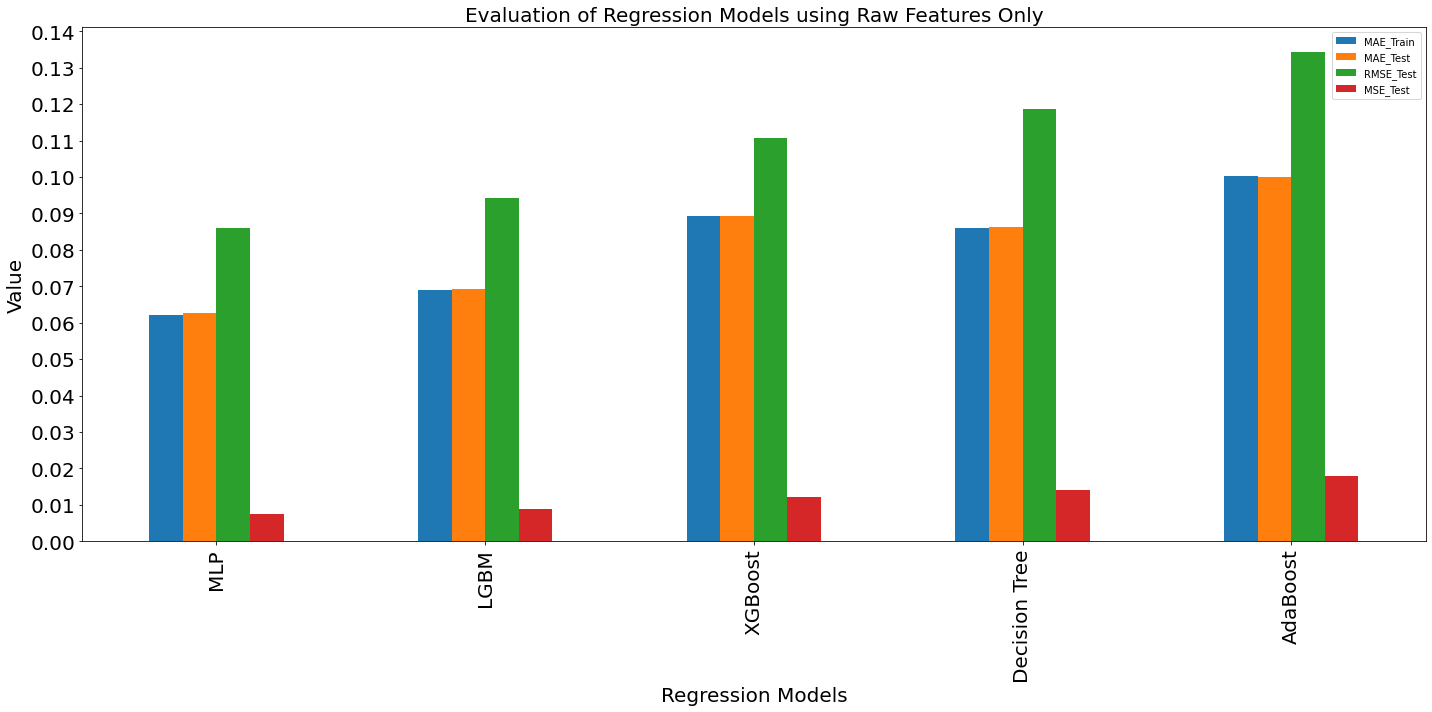

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
Eval.plot(kind="bar", ax=ax)
plt.yticks(np.arange(0, 0.15, 0.01))
plt.xlabel('Regression Models', fontsize=20)
plt.ylabel('Value', fontsize=20)
plt.title('Evaluation of Regression Models using Raw Features Only', fontsize=20)
plt.tight_layout()
plt.savefig('Eval.jpg')
plt.show()

## **Evaluation for Models with Feature Engineering**


In [ ]:
Eval_FE = pd.DataFrame({
    "MAE_Train_FE":[abs(gs_DT_FE_MAE_train),abs(gs_ABR_FE_MAE_train),abs(gs_XGB_FE_MAE_train),abs(gs_LGBM_FE_MAE_train),abs(gs_MLP_FE_MAE_train)],
    "MAE_Test_FE":[gs_DT_FE_MAE_test,gs_ABR_FE_MAE_test,gs_XGB_FE_MAE_test,gs_LGBM_FE_MAE_test,gs_MLP_FE_MAE_test],
    "RMSE_Test_FE":[gs_DT_FE_RMSE_test,gs_ABR_FE_RMSE_test,gs_XGB_FE_RMSE_test,gs_LGBM_FE_RMSE_test,gs_MLP_FE_RMSE_test],
    "MSE_Test_FE":[gs_DT_FE_MSE_test,gs_ABR_FE_MSE_test,gs_XGB_FE_MSE_test,gs_LGBM_FE_MSE_test,gs_MLP_FE_MSE_test]
    },
    index=['Decision Tree','AdaBoost','XGBoost','LGBM','MLP'])

In [ ]:
Eval_FE.sort_values(by=['RMSE_Test_FE'], inplace=True)
Eval_FE

,MAE_Train_FE,MAE_Test_FE,RMSE_Test_FE,MSE_Test_FE
LGBM,0.074,0.074,0.101,0.010
XGBoost,0.093,0.093,0.116,0.013
Decision Tree,0.094,0.094,0.129,0.017
AdaBoost,0.107,0.107,0.143,0.021
MLP,0.147,0.268,0.308,0.095


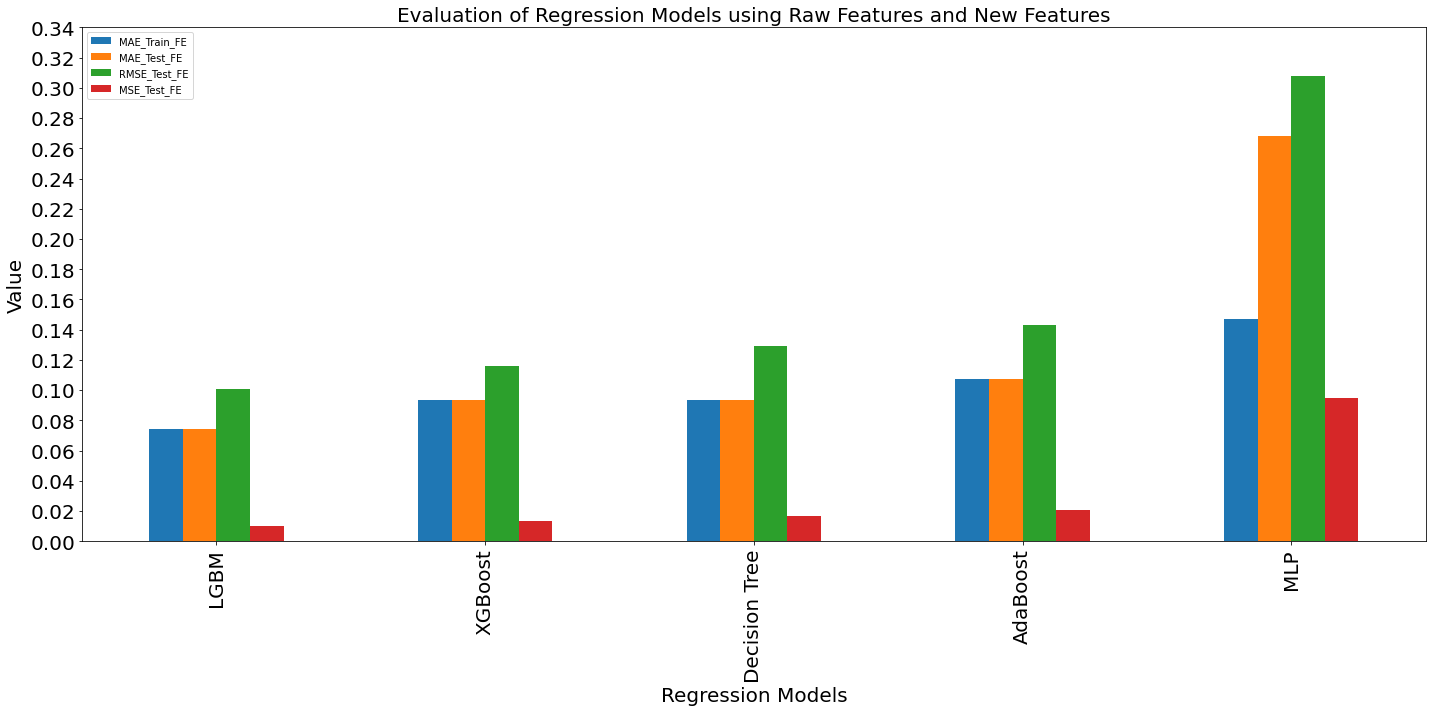

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
Eval_FE.plot(kind="bar", ax=ax)
plt.yticks(np.arange(0, 0.35, 0.02))
plt.xlabel('Regression Models', fontsize=20)
plt.ylabel('Value', fontsize=20)
plt.title('Evaluation of Regression Models using Raw Features and New Features', fontsize=20)
plt.tight_layout()
plt.savefig('Eval_FE.jpg')
plt.show()

## **Overall Evaluation of Models**

In [ ]:
Eval_overall = pd.DataFrame({
    "MAE_Train":[abs(gs_DT_MAE_train),abs(gs_DT_FE_MAE_train),abs(gs_ABR_MAE_train),abs(gs_ABR_FE_MAE_train),abs(gs_XGB_MAE_train),abs(gs_XGB_FE_MAE_train),abs(gs_LGBM_MAE_train),abs(gs_LGBM_FE_MAE_train),abs(gs_MLP_MAE_train),abs(gs_MLP_MAE_train),],
    "MAE_Test":[gs_DT_MAE_test,gs_DT_FE_MAE_test,gs_ABR_MAE_test,gs_ABR_FE_MAE_test,gs_XGB_MAE_test,gs_XGB_FE_MAE_test,gs_LGBM_MAE_test,gs_LGBM_FE_MAE_test,gs_MLP_MAE_test,gs_MLP_FE_MAE_test],
    "RMSE_Test":[gs_DT_RMSE_test,gs_DT_FE_RMSE_test,gs_ABR_RMSE_test,gs_ABR_FE_RMSE_test,gs_XGB_RMSE_test,gs_XGB_FE_RMSE_test,gs_LGBM_RMSE_test,gs_LGBM_FE_RMSE_test,gs_MLP_RMSE_test,gs_MLP_FE_RMSE_test],
    "MSE_Test":[gs_DT_MSE_test,gs_DT_FE_MSE_test,gs_ABR_MSE_test,gs_ABR_FE_MSE_test,gs_XGB_MSE_test,gs_XGB_FE_MSE_test,gs_LGBM_MSE_test,gs_LGBM_FE_MSE_test,gs_MLP_MSE_test,gs_MLP_FE_MSE_test]
    },
    index=['DT_Original','DT_FE','ABR_Original','ABR_FE','XGB_Original','XGB_FE','LGBM_Original','LGBM_FE','MLP_Original','MLP_FE'])

In [ ]:
Eval_overall.sort_values(by=['RMSE_Test'], inplace=True)
Eval_overall

,MAE_Train,MAE_Test,RMSE_Test,MSE_Test
MLP_Original,0.062,0.063,0.086,0.007
LGBM_Original,0.069,0.069,0.094,0.009
LGBM_FE,0.074,0.074,0.101,0.010
XGB_Original,0.089,0.089,0.111,0.012
XGB_FE,0.093,0.093,0.116,0.013
DT_Original,0.086,0.086,0.119,0.014
DT_FE,0.094,0.094,0.129,0.017
ABR_Original,0.100,0.100,0.134,0.018
ABR_FE,0.107,0.107,0.143,0.021
MLP_FE,0.062,0.268,0.308,0.095


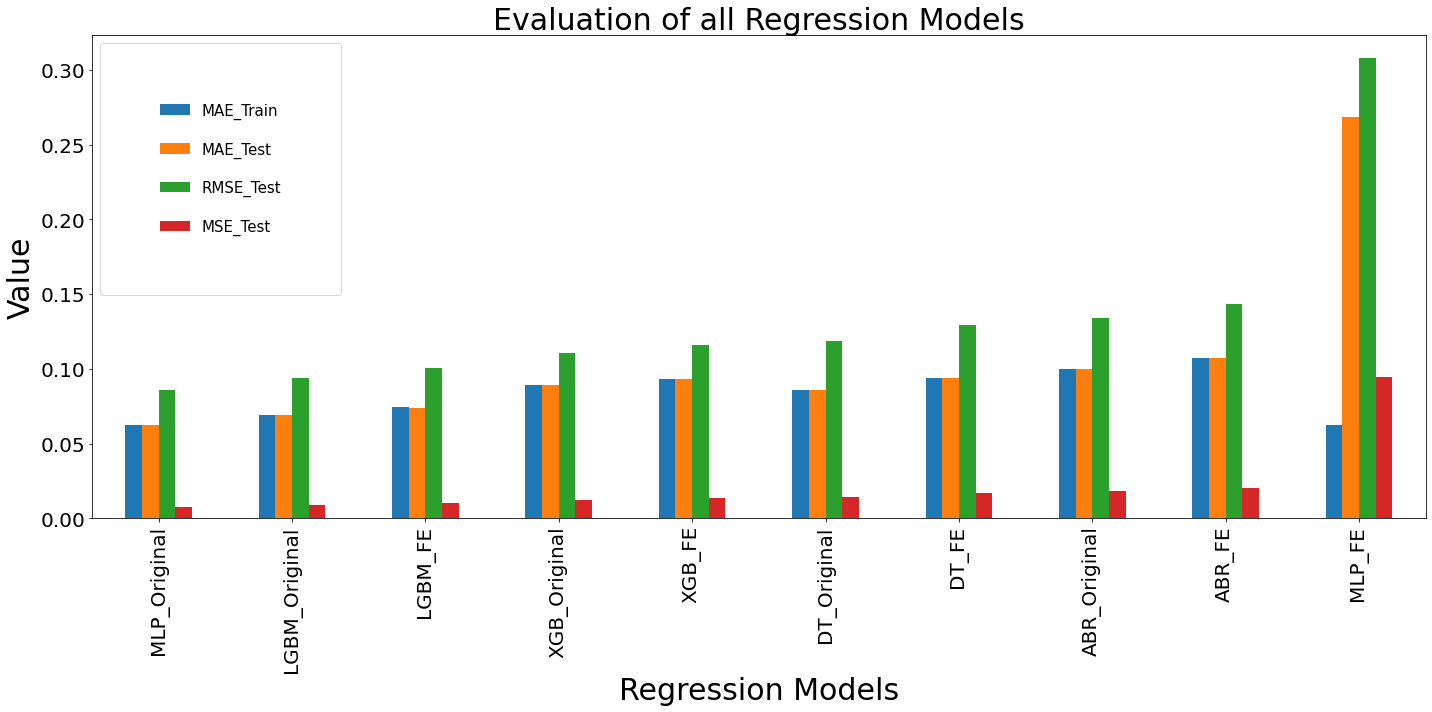

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
Eval_overall.plot(kind="bar", ax=ax)
plt.yticks(np.arange(0, 0.35, 0.05))
plt.xlabel('Regression Models', fontsize=30)
plt.ylabel('Value', fontsize=30)
plt.title('Evaluation of all Regression Models', fontsize=30)
ax.legend(loc='best', borderpad=4, labelspacing=1.5, fontsize = 15)
plt.tight_layout()
plt.savefig('Eval_overall1.jpg')
plt.show()

# **Winner Placement Percentile Prediction**

**Selecting the same columns as in training dataset and scaling it using Scaler parameters used for training dataset**

In [ ]:
total_test = total_test[['walkDistance','killPlace','matchDuration','numGroups','maxPlace','rideDistance','damageDealt','kills','killStreaks','rankPoints','boosts','longestKill','DBNOs','weaponsAcquired','winPoints','killPoints','heals']].copy()
total_test_scaled = scaler.transform(total_test)

**Prediting the values of Winning Placement Percentile using MLP Regressor**

In [ ]:
y_pred = pd.DataFrame(grid_results_MLP.best_estimator_.predict(total_test_scaled), columns=["Predicted_WinPlacePerc"])
total_test = total_test.join(y_pred)

In [ ]:
total_test

,walkDistance,killPlace,matchDuration,numGroups,maxPlace,rideDistance,damageDealt,kills,killStreaks,rankPoints,boosts,longestKill,DBNOs,weaponsAcquired,winPoints,killPoints,heals,Predicted_WinPlacePerc
0,6.377,73,1884,28,28,0.000,3.941,0,0,7.313,0,0.000,0,0.000,-1.000,-1.000,0,0.232
1,7.609,11,1811,47,48,8.449,5.188,2,1,7.315,4,5.891,0,1.792,-1.000,-1.000,2,0.901
2,6.669,49,1793,27,28,0.000,3.153,0,0,7.356,0,0.000,0,1.386,-1.000,-1.000,4,0.635
3,7.502,54,1834,44,45,0.000,4.182,0,0,7.290,0,0.000,0,1.099,-1.000,-1.000,0,0.560
4,7.994,7,1326,27,28,0.000,5.800,3,1,7.300,4,4.095,1,1.386,-1.000,-1.000,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934169,7.495,4,1292,20,22,0.000,5.943,4,2,0.000,2,4.238,3,1.609,1526.000,1294.000,7,0.742
1934170,7.086,64,1301,26,27,0.000,0.000,0,0,0.000,0,0.000,0,1.099,1496.000,1449.000,0,0.401
1934171,8.110,24,1314,29,29,0.000,4.521,1,1,7.301,0,3.234,0,1.099,-1.000,-1.000,3,0.878
1934172,7.546,25,1333,48,49,0.000,4.932,1,1,7.283,2,4.218,0,1.386,-1.000,-1.000,12,0.847
